# CCE || MS Interpretation 2 | NMF by Iteration

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import ast
import math

# IMPORTING/EXPORTING
import json
import csv

# BESPOKE
import packages.spectra_visualiser.spectra_visualiser as vis
import packages.carboxy.carboxy as cbx

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# MACHINE LEARNING
from sklearn.decomposition import (PCA, NMF, LatentDirichletAllocation)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from scipy.spatial.distance import cosine

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
# import counts of unique peak data for each temperature
# format to dictionaries
with open('output_interpretation\\cce_count_rt.txt') as f:
    count_temp = json.loads(f.read())
    
count_rt = {}
for key in count_temp:
    count_rt[float(key)] = count_temp[key]
    
with open('output_interpretation\\cce_count_50.txt') as f:
    count_temp = json.loads(f.read())
    
count_50 = {}
for key in count_temp:
    count_50[float(key)] = count_temp[key]
    
with open('output_interpretation\\cce_count_ST.txt') as f:
    count_temp = json.loads(f.read())
    
count_ST = {}
for key in count_temp:
    count_ST[float(key)] = count_temp[key]

In [3]:
"""
# import list of unique elements for each sample at each temperature
# format to a nested list 
ue_rt_df = pd.read_csv('output_interpretation\\cce_ue_rt.csv', index_col=0)
ue_rt_df.columns=['Data']
ue_rt = ue_rt_df.values.tolist()
    
ue_50_df = pd.read_csv('output_interpretation\\cce_ue_50.csv', index_col=0)
ue_50_df.columns=['Data']
ue_50 = ue_50_df.values.tolist()

ue_ST_df = pd.read_csv('output_interpretation\\cce_ue_ST.csv', index_col=0)
ue_ST_df.columns=['Data']
ue_ST = ue_ST_df.values.tolist()
"""

"\n# import list of unique elements for each sample at each temperature\n# format to a nested list \nue_rt_df = pd.read_csv('output_interpretation\\cce_ue_rt.csv', index_col=0)\nue_rt_df.columns=['Data']\nue_rt = ue_rt_df.values.tolist()\n    \nue_50_df = pd.read_csv('output_interpretation\\cce_ue_50.csv', index_col=0)\nue_50_df.columns=['Data']\nue_50 = ue_50_df.values.tolist()\n\nue_ST_df = pd.read_csv('output_interpretation\\cce_ue_ST.csv', index_col=0)\nue_ST_df.columns=['Data']\nue_ST = ue_ST_df.values.tolist()\n"

In [4]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_rt = [
    [282.0, 758.0, 814.0],
    [282.0, 289.0, 312.0, 453.0],
    [288.0, 306.0, 362.0, 758.0],
    [675.0, 758.0, 814.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0, 755.0, 870.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 440.0, 454.0, 482.0, 485.0, 758.0],
    [282.0, 289.0, 306.0, 453.0, 454.0, 482.0, 933.0],
    [252.0, 261.0, 268.0, 282.0, 312.0, 362.0, 453.0, 933.0],
    [814.0, 851.0, 854.0, 933.0],
    [282.0, 453.0, 758.0, 933.0],
    [282.0, 453.0],
    [282.0, 362.0, 453.0, 755.0, 758.0],
    [282.0, 453.0, 800.0],
    [246.0, 287.0, 288.0, 289.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [289.0, 306.0, 758.0],
    [758.0],
    [252.0, 261.0, 268.0, 282.0, 362.0, 453.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0],
    [282.0, 453.0, 758.0],
    [252.0, 259.0, 261.0, 268.0, 795.0, 854.0, 933.0],
    [282.0, 306.0, 758.0],
    [814.0, 832.0, 851.0, 911.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 366.0, 424.0, 440.0, 758.0],
    [362.0, 371.0, 378.0, 758.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 306.0, 362.0, 371.0, 453.0, 933.0],
    [453.0, 854.0, 933.0],
    [282.0, 362.0, 453.0, 545.0, 933.0, 934.0, 974.0, 1007.0],
    [362.0, 758.0, 933.0, 1007.0],
    [282.0, 453.0, 933.0],
    [246.0, 287.0, 288.0, 289.0, 306.0, 307.0, 440.0, 454.0, 482.0],
    [362.0, 371.0, 758.0, 933.0],
    [282.0, 289.0, 306.0, 312.0, 322.0, 352.0, 453.0, 597.0, 755.0],
    [362.0, 371.0, 545.0, 758.0, 933.0],
    [282.0, 362.0, 371.0, 453.0, 933.0],
    [691.0, 713.0, 792.0, 814.0, 832.0, 851.0, 854.0, 911.0],
    [246.0, 282.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0, 454.0, 482.0, 933.0],
    [282.0, 289.0, 453.0, 597.0, 755.0, 758.0],
    [362.0, 371.0, 378.0, 758.0, 854.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 289.0, 453.0, 597.0, 755.0],
    [289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 634.0, 713.0, 795.0, 854.0],
    [282.0, 362.0, 371.0, 545.0, 933.0, 934.0, 974.0],
    [758.0, 933.0, 1007.0],
    [246.0,282.0,287.0,288.0,289.0,306.0,307.0,364.0,424.0,440.0,454.0,482.0,933.0],
    [282.0, 289.0, 306.0, 324.0, 453.0, 597.0, 755.0],
    [758.0, 933.0],
    [282.0, 362.0, 371.0, 758.0, 933.0],
    [675.0, 758.0, 814.0, 933.0],
    [753.0, 772.0, 776.0, 792.0, 832.0, 854.0],
    [524.0, 545.0, 566.0, 597.0, 645.0, 658.0, 776.0, 792.0, 854.0],
    [288.0, 306.0, 307.0, 776.0, 792.0, 854.0],
    [302.0, 306.0, 324.0, 326.0, 933.0],
    [776.0, 792.0, 854.0, 933.0],
    [246.0, 265.0, 288.0, 289.0, 306.0, 307.0, 366.0],
    [288.0, 289.0, 306.0, 307.0, 758.0],
    [246.0,288.0,289.0,306.0,307.0,366.0,776.0,792.0,854.0,933.0,934.0,974.0],
    [306.0,367.0,703.0,713.0,733.0,776.0,792.0,795.0,832.0,833.0,850.0,854.0,855.0,911.0,912.0,933.0,934.0,951.0,974.0,1624.0,1703.0,1704.0],
    [288.0,289.0,306.0,307.0,324.0,325.0,326.0,367.0,776.0,792.0,795.0,854.0],
    [306.0,367.0,545.0,758.0,776.0,788.0,792.0,795.0,854.0,933.0,934.0,951.0,974.0,1041.0,1235.0,1415.0,1595.0,1775.0],
    [367.0, 776.0, 792.0, 795.0, 832.0, 833.0, 854.0, 911.0, 933.0, 934.0, 974.0],
    [776.0, 792.0, 832.0, 846.0, 854.0, 925.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 366.0, 792.0, 854.0],
    [288.0, 289.0, 306.0, 307.0, 324.0, 326.0, 758.0],
    [282.0, 367.0, 367.0, 792.0, 854.0],
    [282.0, 289.0, 312.0, 367.0, 453.0, 466.0, 792.0, 795.0, 854.0, 933.0],
    [282.0,289.0,312.0,322.0,367.0,453.0,466.0,545.0,792.0,795.0,854.0,872.0,933.0],
    [282.0,282.0,283.0,289.0,312.0,320.0,322.0,453.0,466.0,503.0,545.0,597.0,634.0,674.0,713.0,755.0,758.0,792.0],
    [282.0,289.0,312.0,322.0,367.0,436.0,437.0,453.0,466.0,503.0,545.0,674.0,758.0,776.0,792.0,854.0,933.0,934.0,974.0,976.0,1041.0,1055.0,1221.0,1235.0,1415.0],
    [367.0, 758.0, 776.0, 792.0, 854.0, 933.0],
    [282.0,367.0,436.0,437.0,451.0,453.0,545.0,776.0,792.0,795.0,854.0,933.0,934.0,974.0],
    [282.0, 289.0, 312.0, 322.0, 367.0, 453.0, 466.0, 503.0, 545.0, 674.0, 753.0],
    [367.0, 367.0, 776.0, 792.0, 795.0, 832.0, 854.0, 911.0, 933.0, 1741.0],
    [282.0, 367.0, 758.0, 792.0],
    [367.0, 776.0, 792.0, 795.0, 832.0, 854.0, 933.0],
    [367.0, 367.0, 758.0, 792.0, 854.0],
    [367.0, 436.0, 437.0, 451.0, 758.0, 776.0, 792.0, 854.0, 933.0, 934.0, 974.0],
    [282.0,282.0,283.0,288.0,289.0,306.0,307.0,312.0,320.0,322.0,436.0,437.0,451.0,453.0,466.0,503.0,545.0,674.0,776.0,792.0,854.0,933.0,934.0,944.0,974.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,322.0,324.0,326.0,367.0,453.0,466.0,482.0,545.0,776.0,792.0,795.0,854.0,933.0],
    [755.0, 758.0],
    [],
    [367.0,367.0,436.0,437.0,451.0,776.0,792.0,795.0,854.0,933.0,934.0,974.0],
    [282.0,367.0,436.0,437.0,451.0,453.0,758.0,776.0,788.0,792.0,795.0,854.0,872.0,933.0,934.0,951.0,974.0],
    [758.0],
    [484.0, 563.0],
    [367.0, 436.0, 437.0, 758.0, 792.0, 854.0, 933.0, 1041.0],
    [282.0, 367.0, 453.0, 758.0, 792.0, 795.0, 854.0, 933.0],
    [776.0, 792.0, 854.0],
    [265.0,282.0,287.0,288.0,289.0,306.0,312.0,324.0,325.0,326.0,367.0,453.0,466.0,776.0,792.0,795.0,854.0],
    [758.0, 933.0, 934.0, 974.0, 1055.0, 1235.0, 1415.0, 1595.0],
    [282.0, 289.0, 312.0, 322.0, 453.0, 466.0, 503.0, 545.0, 674.0, 753.0, 933.0],
    [265.0,282.0,282.0,289.0,289.0,302.0,312.0,320.0,322.0,324.0,325.0,326.0,327.0,367.0,453.0,466.0,503.0,545.0,597.0,674.0,753.0,755.0,792.0,854.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,440.0,453.0,466.0,545.0,674.0,758.0,792.0,854.0,933.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,436.0,437.0,451.0,453.0,454.0,466.0,482.0,545.0,739.0,758.0,776.0,792.0,854.0,933.0,934.0,944.0,974.0],
    [282.0, 453.0, 674.0, 792.0, 795.0, 854.0, 933.0, 934.0, 974.0],
    [282.0, 453.0, 758.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,315.0,453.0,720.0,776.0,792.0,854.0,861.0,933.0],
    [],
    [],
    [367.0, 367.0, 795.0],
    [367.0, 795.0],
    [854.0],
    [854.0],
    [],
    [795.0, 854.0],
    [854.0],
    [],
    [367.0],
    [785.0],
    [795.0],
    [],
    [],
    [367.0, 367.0, 691.0, 732.0, 750.0, 795.0],
    [],
    [785.0],
    [367.0, 795.0],
    [],
    [367.0, 795.0],
    [367.0, 795.0],
    [265.0, 291.0],
    [367.0, 367.0, 795.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 324.0, 424.0],
    [327.0, 367.0, 367.0, 732.0, 795.0],
    [265.0, 267.0, 287.0, 289.0, 302.0, 306.0, 324.0, 325.0, 326.0],
    [287.0, 289.0, 306.0, 440.0, 854.0],
    [795.0],
    [],
    [429.0],
    [265.0, 267.0, 287.0, 289.0, 306.0, 324.0, 325.0, 326.0],
    [265.0, 291.0, 302.0, 795.0],
    [265.0, 367.0, 795.0],
    [],
    [367.0, 367.0],
    [795.0, 854.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0, 594.0, 854.0],
    [854.0],
    [289.0, 306.0],
    [265.0, 289.0, 291.0, 306.0, 324.0, 325.0, 326.0],
    [],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0],
    [367.0],
    [367.0],
    [429.0],
    [],
    [],
    [327.0, 336.0, 367.0, 367.0, 691.0, 716.0, 732.0, 795.0],
    [634.0,645.0,691.0,692.0,713.0,720.0,776.0,792.0,792.0,795.0,834.0,835.0,836.0,854.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,594.0,634.0,645.0,691.0,713.0,720.0,792.0,792.0,834.0,835.0,836.0,854.0],
    [265.0,306.0,327.0,336.0,367.0,367.0,691.0,713.0,716.0,732.0,795.0,851.0],
    [246.0, 287.0, 288.0, 306.0, 347.0, 597.0],
    [287.0, 524.0, 645.0, 646.0, 776.0, 792.0, 854.0, 855.0],
    [265.0, 289.0, 691.0, 792.0, 795.0, 834.0, 854.0],
    [246.0, 287.0, 288.0, 289.0, 305.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 597.0],
    [429.0, 785.0],
    [],
    [265.0, 267.0, 302.0, 324.0, 367.0, 795.0],
    [246.0,247.0,265.0,287.0,288.0,289.0,290.0,306.0,307.0,570.0,571.0,572.0,594.0,595.0,630.0,632.0],
    [814.0],
    [],
    [327.0, 367.0, 367.0, 691.0, 716.0, 732.0, 795.0, 851.0, 1487.0],
    [265.0, 267.0, 302.0, 324.0, 795.0],
    [634.0,645.0,691.0,713.0,720.0,776.0,792.0,792.0,795.0,832.0,833.0,834.0,836.0,851.0,854.0,911.0,912.0],
    [634.0,645.0,691.0,713.0,720.0,776.0,792.0,792.0,795.0,832.0,834.0,851.0,854.0,911.0],
    [265.0, 267.0, 306.0, 324.0, 565.0, 589.0],
    [367.0,634.0,691.0,713.0,732.0,772.0,792.0,795.0,832.0,834.0,851.0,911.0],
    [327.0, 367.0, 367.0, 732.0, 795.0],
    [691.0, 832.0, 834.0, 854.0, 911.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0],
    [634.0, 645.0, 691.0, 713.0, 792.0, 795.0, 834.0, 854.0],
    [834.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 299.0, 306.0, 307.0, 440.0, 594.0],
    [289.0, 327.0, 367.0, 367.0, 732.0, 769.0, 795.0],
    [832.0, 854.0, 911.0],
    [327.0, 367.0, 367.0, 732.0, 795.0, 851.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,308.0,380.0,440.0,570.0,594.0],
    [289.0, 306.0, 675.0, 736.0, 814.0, 815.0, 854.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,347.0,594.0,595.0,834.0],
    [246.0,287.0,288.0,289.0,306.0,307.0,367.0,390.0,524.0,566.0,594.0,645.0,720.0,740.0,823.0,824.0,834.0,837.0,838.0],
    [691.0, 834.0],
    [634.0, 645.0, 691.0, 713.0, 792.0, 795.0, 834.0, 854.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 594.0],
    [246.0,265.0,267.0,287.0,288.0,289.0,290.0,306.0,307.0,324.0,326.0,440.0,613.0,634.0,645.0,691.0,713.0,792.0,834.0],
    [289.0, 327.0, 367.0, 367.0, 795.0],
    [245.0,246.0,247.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,380.0,424.0,440.0,570.0,594.0,595.0,630.0,834.0],
    [327.0, 367.0, 367.0, 795.0],
    [246.0, 287.0, 288.0, 289.0, 305.0, 306.0, 322.0, 347.0, 379.0, 589.0, 854.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 594.0],
    [814.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,347.0,594.0,645.0,713.0,792.0,834.0],
    [246.0,287.0,289.0,306.0,524.0,566.0,634.0,645.0,646.0,691.0,713.0,720.0,792.0,834.0,835.0,836.0,854.0]
]

In [5]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_50 = [
    [282.0, 675.0, 758.0, 814.0],
    [282.0, 289.0, 312.0, 453.0],
    [306.0, 307.0, 758.0],
    [675.0, 758.0, 814.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0, 755.0, 870.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 289.0, 306.0, 454.0, 482.0, 933.0],
    [252.0, 261.0, 268.0, 282.0, 312.0, 453.0, 854.0, 933.0],
    [814.0, 832.0, 854.0, 911.0, 933.0],
    [933.0],
    [282.0, 453.0],
    [282.0, 453.0, 758.0],
    [282.0, 453.0, 800.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 423.0, 424.0, 454.0, 482.0],
    [289.0, 306.0, 758.0, 933.0],
    [289.0, 758.0],
    [261.0, 268.0, 282.0, 289.0, 453.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0],
    [282.0, 758.0],
    [252.0, 259.0, 261.0, 268.0, 854.0, 933.0],
    [306.0, 758.0],
    [675.0, 814.0, 832.0, 851.0, 911.0],
    [246.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,423.0,440.0,454.0,482.0],
    [282.0, 362.0, 545.0, 933.0, 934.0, 974.0],
    [282.0, 306.0, 362.0, 933.0],
    [282.0, 453.0, 854.0, 933.0],
    [282.0, 362.0, 453.0, 545.0, 933.0, 934.0, 974.0],
    [362.0, 758.0, 933.0],
    [282.0, 453.0, 933.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 423.0, 440.0, 454.0, 482.0],
    [268.0, 758.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0],
    [362.0, 545.0, 933.0, 934.0, 974.0],
    [282.0, 362.0, 453.0, 933.0],
    [453.0, 814.0, 832.0, 851.0, 854.0, 911.0, 933.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 424.0, 440.0, 454.0, 482.0, 933.0],
    [282.0, 289.0, 453.0, 484.0, 563.0, 653.0, 755.0],
    [362.0, 371.0, 378.0, 758.0, 854.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 289.0, 453.0, 597.0, 755.0],
    [289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 634.0, 713.0, 795.0, 837.0, 854.0],
    [282.0, 362.0, 371.0, 453.0, 545.0, 933.0, 934.0, 974.0],
    [545.0, 758.0, 933.0, 934.0, 974.0],
    [246.0,282.0,287.0,288.0,289.0,306.0,307.0,364.0,423.0,424.0,440.0,454.0,482.0,933.0],
    [282.0, 289.0, 289.0, 306.0, 324.0, 453.0, 755.0],
    [443.0, 758.0, 788.0, 933.0],
    [282.0, 362.0, 371.0, 758.0, 933.0],
    [675.0, 758.0, 814.0, 933.0, 974.0],
    [265.0,267.0,367.0,571.0,575.0,585.0,589.0,691.0,713.0,732.0,795.0,834.0,872.0],
    [282.0, 453.0, 634.0, 662.0, 713.0, 755.0, 792.0, 795.0, 834.0, 854.0, 872.0],
    [265.0, 267.0, 302.0, 324.0, 565.0, 569.0, 579.0, 658.0],
    [265.0, 267.0, 302.0, 324.0, 565.0, 569.0, 579.0, 658.0],
    [246.0,247.0,265.0,287.0,289.0,290.0,291.0,306.0,308.0,322.0,379.0,497.0,565.0,589.0,591.0,597.0,611.0,612.0,615.0,615.0,639.0,693.0,694.0,751.0,772.0,792.0,831.0,851.0,854.0,1059.0,1141.0,1142.0,1159.0,1160.0,1161.0,1173.0,1177.0],
    [246.0,247.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,519.0,594.0,788.0],
    [246.0,265.0,282.0,282.0,289.0,289.0,302.0,306.0,324.0,325.0,326.0,450.0,466.0,480.0,484.0,545.0,563.0,579.0,625.0,658.0],
    [245.0,246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,788.0,854.0,919.0,933.0],
    [306.0,634.0,662.0,691.0,713.0,720.0,788.0,792.0,792.0,834.0,854.0,933.0],
    [246.0,265.0,282.0,287.0,288.0,289.0,306.0,307.0,324.0,325.0,326.0,366.0,424.0,795.0,872.0],
    [282.0,306.0,453.0,545.0,662.0,691.0,776.0,788.0,789.0,792.0,834.0,854.0,872.0,919.0,933.0,934.0,960.0,974.0,982.0,998.0,1012.0],
    [662.0, 788.0, 832.0, 854.0, 911.0, 933.0],
    [301.0, 312.0, 367.0, 453.0, 645.0, 769.0, 851.0, 865.0],
    [246.0,287.0,288.0,289.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,662.0],
    [246.0,282.0,288.0,289.0,289.0,306.0,307.0,324.0,326.0,364.0,380.0,440.0,597.0,662.0,755.0],
    [282.0, 282.0, 312.0, 367.0, 453.0, 579.0, 597.0, 658.0, 662.0, 755.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0, 792.0, 854.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0, 792.0, 854.0],
    [453.0, 597.0, 662.0, 755.0],
    [282.0, 312.0, 442.0, 453.0, 662.0, 788.0, 789.0, 854.0, 919.0, 933.0, 998.0],
    [282.0, 453.0, 662.0, 788.0],
    [282.0, 453.0, 662.0, 788.0, 854.0, 872.0, 933.0],
    [282.0, 453.0, 597.0, 662.0, 755.0],
    [282.0, 453.0, 662.0, 854.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0],
    [282.0, 453.0, 662.0, 776.0, 792.0, 795.0, 854.0, 872.0],
    [597.0, 755.0, 854.0],
    [442.0, 453.0, 758.0, 788.0, 789.0, 854.0, 919.0, 933.0],
    [288.0,289.0,306.0,307.0,380.0,424.0,440.0,453.0,454.0,482.0,662.0,788.0,919.0,933.0],
    [221.0,246.0,288.0,289.0,290.0,306.0,307.0,324.0,364.0,365.0,366.0,380.0,424.0,440.0,662.0,872.0],
    [282.0, 597.0, 755.0, 758.0],
    [282.0, 453.0, 661.0, 662.0, 721.0, 800.0],
    [442.0, 788.0, 854.0, 919.0, 933.0, 934.0, 961.0, 974.0, 992.0, 1012.0],
    [282.0,312.0,442.0,453.0,545.0,662.0,720.0,788.0,789.0,792.0,795.0,854.0,872.0,919.0,933.0,934.0,974.0],
    [585.0,661.0,662.0,675.0,703.0,721.0,722.0,736.0,753.0,800.0,801.0,814.0],
    [271.0, 282.0, 282.0, 289.0, 312.0, 375.0, 453.0, 484.0, 563.0],
    [662.0, 758.0, 788.0, 854.0, 919.0, 933.0],
    [282.0, 453.0, 597.0, 755.0, 795.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,570.0,594.0,595.0,596.0,630.0],
    [246.0,265.0,282.0,282.0,288.0,289.0,306.0,307.0,324.0,325.0,326.0,380.0,440.0,597.0,662.0,755.0],
    [282.0, 662.0, 758.0, 788.0, 933.0],
    [442.0, 453.0, 662.0, 933.0],
    [246.0,265.0,282.0,282.0,288.0,289.0,302.0,306.0,307.0,324.0,325.0,326.0,440.0,453.0,597.0,662.0,755.0],
    [246.0,288.0,289.0,306.0,307.0,380.0,397.0,440.0,454.0,482.0,758.0,788.0,919.0,933.0],
    [288.0,289.0,306.0,307.0,380.0,440.0,454.0,482.0,662.0,788.0,919.0,933.0],
    [453.0, 662.0, 788.0, 854.0, 933.0],
    [597.0, 662.0, 755.0, 758.0, 788.0],
    [245.0,246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,364.0,366.0,380.0,424.0,440.0,441.0],
    [854.0, 933.0, 934.0, 974.0],
    [854.0, 933.0],
    [870.0],
    [],
    [814.0, 933.0],
    [933.0],
    [854.0, 933.0, 934.0, 974.0],
    [795.0, 854.0, 933.0, 934.0, 974.0],
    [362.0, 854.0, 914.0, 933.0],
    [933.0, 934.0, 974.0],
    [],
    [],
    [795.0, 854.0, 872.0, 933.0, 934.0, 974.0],
    [429.0],
    [429.0, 484.0, 563.0, 653.0, 851.0],
    [367.0, 634.0, 732.0, 792.0, 795.0, 851.0, 854.0, 872.0],
    [],
    [758.0, 933.0],
    [],
    [758.0],
    [],
    [],
    [246.0,265.0,267.0,287.0,288.0,289.0,290.0,306.0,307.0,324.0,326.0,424.0,570.0,575.0,589.0,591.0,594.0],
    [327.0, 367.0, 367.0, 484.0, 563.0],
    [245.0, 246.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [367.0, 367.0, 732.0, 795.0],
    [265.0, 288.0, 289.0, 306.0, 307.0, 324.0, 326.0, 440.0, 454.0, 482.0],
    [288.0, 289.0, 306.0, 454.0, 482.0, 933.0],
    [933.0],
    [933.0],
    [429.0, 600.0],
    [246.0,265.0,288.0,289.0,306.0,307.0,308.0,324.0,326.0,445.0,454.0,461.0,482.0],
    [265.0, 267.0, 287.0, 289.0, 306.0, 324.0, 325.0, 326.0, 795.0],
    [265.0, 289.0, 306.0, 324.0, 325.0, 326.0, 795.0],
    [933.0],
    [265.0, 302.0, 367.0, 429.0, 484.0, 563.0, 653.0],
    [776.0, 792.0, 795.0, 854.0, 933.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [933.0],
    [289.0, 306.0, 454.0, 482.0, 933.0],
    [],
    [289.0, 306.0, 307.0, 324.0, 326.0, 454.0, 482.0, 933.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,424.0,440.0,454.0,482.0,933.0],
    [265.0, 267.0, 302.0, 324.0, 367.0, 589.0],
    [933.0],
    [429.0, 484.0, 509.0, 563.0, 600.0],
    [362.0, 854.0, 933.0],
    [362.0, 933.0],
    [367.0, 367.0, 634.0, 691.0, 713.0, 732.0, 792.0, 795.0],
    [246.0,247.0,265.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,594.0,595.0,634.0,691.0,713.0,776.0,792.0,792.0,854.0],
    [246.0,247.0,265.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,594.0,595.0,634.0,645.0,691.0,713.0,792.0,792.0,854.0],
    [265.0,289.0,306.0,618.0,634.0,691.0,713.0,792.0,792.0,795.0,834.0,851.0,854.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,320.0,322.0,347.0,594.0,595.0,596.0,597.0,668.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,347.0,560.0,568.0,569.0,570.0,594.0,595.0,596.0,645.0,657.0,854.0],
    [246.0,265.0,267.0,289.0,306.0,758.0,788.0,795.0,854.0,872.0,933.0,934.0,974.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 594.0, 595.0, 596.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,594.0,595.0,596.0],
    [246.0,247.0,288.0,289.0,290.0,306.0,307.0,379.0,380.0,440.0,454.0,482.0,594.0,595.0,597.0,740.0],
    [429.0, 585.0, 675.0, 703.0, 736.0, 753.0, 814.0],
    [289.0, 740.0, 933.0],
    [246.0,265.0,288.0,289.0,306.0,307.0,324.0,326.0,440.0,453.0,458.0,482.0,589.0],
    [246.0,247.0,288.0,289.0,290.0,298.0,305.0,306.0,307.0,424.0,440.0,594.0,595.0,740.0],
    [289.0, 306.0, 740.0, 814.0, 933.0],
    [362.0, 443.0, 933.0],
    [246.0,289.0,306.0,645.0,691.0,713.0,792.0,792.0,795.0,832.0,851.0,854.0,933.0],
    [246.0,247.0,265.0,267.0,288.0,289.0,290.0,298.0,306.0,307.0,324.0,424.0,589.0,594.0,595.0,740.0],
    [246.0,265.0,275.0,288.0,289.0,289.0,290.0,298.0,306.0,307.0,324.0,436.0,453.0,524.0,566.0,594.0,595.0,634.0,645.0,691.0,713.0,720.0,792.0,792.0,795.0,832.0,833.0,851.0,854.0,861.0,911.0,912.0],
    [246.0,289.0,306.0,453.0,566.0,594.0,595.0,645.0,691.0,713.0,720.0,792.0,792.0,795.0,832.0,851.0,854.0,861.0,911.0,933.0],
    [246.0,287.0,288.0,289.0,290.0,297.0,298.0,305.0,306.0,307.0,364.0,424.0,440.0,454.0,482.0,524.0,594.0,740.0],
    [246.0,288.0,289.0,290.0,298.0,306.0,453.0,482.0,645.0,740.0,795.0,851.0,854.0,933.0],
    [246.0, 289.0, 295.0, 306.0, 429.0, 447.0, 524.0, 740.0, 795.0],
    [854.0, 933.0, 934.0, 974.0],
    [246.0,287.0,288.0,289.0,290.0,295.0,306.0,307.0,313.0,336.0,424.0,429.0,440.0,454.0,482.0,524.0,933.0],
    [289.0,295.0,306.0,312.0,440.0,453.0,524.0,545.0,645.0,854.0,861.0,872.0,933.0,934.0,974.0],
    [289.0, 295.0, 453.0, 524.0, 854.0, 933.0, 934.0, 974.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,424.0,440.0,454.0,482.0,594.0,595.0,740.0,933.0],
    [289.0, 306.0, 367.0, 634.0, 645.0, 713.0, 732.0, 779.0, 792.0, 795.0, 854.0],
    [289.0, 295.0, 313.0, 336.0, 453.0, 454.0, 482.0, 524.0, 854.0, 933.0],
    [429.0, 447.0, 933.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,308.0,397.0,423.0,440.0,454.0,482.0,483.0,485.0,594.0,595.0,740.0],
    [289.0, 306.0, 429.0, 675.0, 814.0, 933.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,366.0,440.0,594.0,595.0,645.0,740.0],
    [246.0,275.0,287.0,288.0,289.0,290.0,306.0,307.0,482.0,594.0,595.0,740.0],
    [289.0, 295.0, 313.0, 336.0, 453.0, 524.0, 854.0, 933.0],
    [289.0,645.0,691.0,788.0,792.0,795.0,854.0,872.0,933.0,934.0,951.0,961.0,974.0,975.0,1012.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 298.0, 306.0, 594.0, 595.0, 596.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,440.0,482.0,594.0,595.0,740.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,366.0,424.0,454.0,482.0,594.0,645.0,854.0,933.0,974.0],
    [282.0, 289.0, 367.0, 484.0],
    [246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,424.0,440.0,454.0,482.0,594.0,595.0,854.0,933.0],
    [306.0],
    [246.0,247.0,265.0,275.0,286.0,287.0,288.0,289.0,290.0,290.0,301.0,306.0,307.0,320.0,322.0,347.0,379.0,493.0,527.0,560.0,575.0,589.0,591.0,594.0,595.0,596.0,611.0,613.0,740.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,440.0,482.0,594.0,595.0],
    [675.0, 814.0, 933.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,568.0,594.0,595.0,657.0,740.0],
    [246.0,247.0,265.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,568.0,569.0,570.0,594.0,595.0,630.0,634.0,645.0,691.0,713.0,792.0,834.0,854.0]
]

In [6]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_ST = [
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,373.0,468.0,500.0,563.0,569.0,570.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0,734.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,373.0,468.0,500.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 486.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 509.0, 541.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 563.0, 568.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,486.0,500.0,505.0,569.0,669.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 509.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,369.0,371.0,373.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0],
    [255.0, 256.0, 313.0, 342.0, 354.0, 355.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0, 970.0, 971.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,509.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,569.0,570.0,662.0,733.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,468.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 509.0, 569.0, 570.0],
    [255.0,256.0,313.0,324.0,343.0,354.0,355.0,371.0,468.0,500.0,569.0,570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 369.0, 371.0, 468.0, 486.0, 500.0, 569.0, 733.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 324.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,373.0,468.0,500.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,662.0,731.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 355.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 486.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,398.0,468.0,500.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,468.0,486.0,500.0,544.0,558.0,569.0,570.0,731.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [245.0,255.0,256.0,286.0,287.0,289.0,306.0,313.0,327.0,328.0,340.0,354.0,355.0,355.0,359.0,539.0,568.0,569.0,662.0],
    [255.0, 256.0, 306.0, 313.0, 354.0, 355.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 479.0, 662.0, 970.0],
    [255.0,272.0,286.0,313.0,314.0,327.0,328.0,340.0,354.0,355.0,359.0,369.0,373.0],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,340.0,341.0,354.0,355.0,369.0,693.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 367.0, 662.0, 970.0, 971.0],
    [255.0,256.0,306.0,313.0,340.0,342.0,354.0,355.0,367.0,369.0,402.0,408.0,409.0,438.0,452.0,479.0,662.0,716.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,500.0,527.0,539.0,558.0,569.0,570.0,733.0],
    [255.0,256.0,265.0,289.0,289.0,290.0,306.0,313.0,328.0,329.0,334.0,340.0,342.0,343.0,346.0,354.0,355.0,369.0,370.0,371.0,384.0,386.0,387.0,388.0,394.0,404.0,445.0,459.0,468.0,486.0,495.0,500.0,527.0,528.0,536.0,537.0,538.0,542.0,569.0,570.0,572.0,731.0,733.0,909.0],
    [255.0,256.0,313.0,354.0,355.0,367.0,408.0,438.0,479.0,563.0,569.0,662.0,970.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 367.0, 408.0, 438.0, 479.0, 662.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 398.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 398.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,429.0,447.0,470.0,505.0,569.0,570.0,669.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 569.0, 570.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 282.0, 313.0, 326.0, 354.0, 355.0, 371.0, 425.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 429.0, 447.0, 470.0, 505.0, 569.0, 669.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 398.0, 555.0, 569.0, 570.0],
    [255.0,256.0,285.0,313.0,328.0,334.0,345.0,346.0,354.0,355.0,369.0,371.0,371.0,373.0,384.0,386.0,387.0,388.0,459.0,468.0,486.0,500.0,536.0,555.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 429.0, 470.0, 505.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 569.0, 570.0],
    [255.0,256.0,272.0,286.0,313.0,340.0,354.0,355.0,569.0,570.0,662.0,988.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 569.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 563.0, 569.0, 570.0, 662.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 569.0, 570.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,340.0,354.0,355.0,408.0,479.0,569.0,662.0,970.0,988.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0],
    [255.0, 256.0, 312.0, 313.0, 354.0, 370.0, 371.0, 373.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 505.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 429.0, 461.0, 505.0, 569.0, 733.0, 734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,429.0,461.0,505.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 569.0, 570.0, 733.0],
    [234.0,255.0,256.0,275.0,282.0,313.0,319.0,324.0,326.0,354.0,371.0,373.0,423.0,569.0,731.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 505.0, 569.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,371.0,429.0,447.0,461.0,505.0,569.0,669.0,733.0,734.0],
    [255.0, 256.0, 272.0, 313.0, 354.0, 355.0, 468.0, 500.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 369.0, 373.0, 429.0, 468.0, 500.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 505.0, 569.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 359.0, 371.0, 373.0, 569.0],
    [234.0,246.0,248.0,255.0,256.0,259.0,261.0,268.0,275.0,278.0,282.0,282.0,286.0,287.0,288.0,289.0,289.0,290.0,291.0,293.0,296.0,302.0,305.0,306.0,310.0,312.0,313.0,313.0,314.0,315.0,315.0,316.0,317.0,319.0,319.0,320.0,324.0,326.0,328.0,329.0,333.0,337.0,338.0,339.0,340.0,341.0,344.0,346.0,347.0,347.0,353.0,354.0,355.0,355.0,356.0,357.0,360.0,361.0,363.0,365.0,367.0,369.0,370.0,371.0,371.0,373.0,373.0,378.0,382.0,383.0,383.0,383.0,384.0,384.0,385.0,386.0,388.0,390.0,391.0,396.0,397.0,397.0,399.0,400.0,402.0,404.0,413.0,414.0,423.0,424.0,425.0,425.0,429.0,430.0,436.0,438.0,443.0,444.0,452.0,455.0,457.0,466.0,468.0,468.0,482.0,487.0,496.0,500.0,509.0,523.0,528.0,537.0,569.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 369.0, 468.0, 470.0, 500.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,468.0,470.0,500.0,569.0,570.0,733.0],
    [234.0,255.0,256.0,275.0,288.0,291.0,312.0,313.0,353.0,354.0,373.0,429.0,430.0,447.0,505.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 429.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 563.0, 569.0, 662.0, 970.0],
    [255.0,256.0,313.0,324.0,354.0,355.0,369.0,373.0,384.0,468.0,500.0,536.0],
    [255.0,256.0,285.0,313.0,354.0,373.0,384.0,429.0,563.0,569.0,570.0,662.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 373.0, 429.0, 563.0, 569.0, 662.0, 733.0],
    [246.0,255.0,256.0,270.0,289.0,306.0,313.0,354.0,355.0,423.0,485.0,569.0],
    [255.0,256.0,285.0,313.0,354.0,371.0,373.0,429.0,470.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,354.0,373.0,429.0,461.0,470.0,505.0,569.0,570.0,733.0,734.0,897.0,899.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 373.0, 563.0, 569.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 468.0, 500.0, 563.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,468.0,500.0,563.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 408.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [246.0,255.0,256.0,289.0,306.0,313.0,354.0,355.0,468.0,500.0,597.0,662.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,429.0,461.0,468.0,470.0,500.0,505.0,569.0,733.0,734.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,500.0,558.0,569.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,355.0,429.0,470.0,500.0,563.0,569.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,373.0,468.0,470.0,500.0,558.0,569.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 563.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,429.0,468.0,470.0,500.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,324.0,354.0,355.0,369.0,373.0,384.0,468.0,500.0,569.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,373.0,468.0,470.0,500.0,558.0,569.0,733.0],
    [255.0, 256.0, 288.0, 313.0, 324.0, 354.0, 355.0, 369.0, 468.0, 470.0, 500.0],
    [246.0,255.0,256.0,257.0,262.0,265.0,270.0,271.0,279.0,281.0,282.0,287.0,288.0,289.0,297.0,306.0,306.0,309.0,313.0,315.0,323.0,324.0,325.0,338.0,354.0,355.0,355.0,384.0,396.0,408.0,423.0,423.0,425.0,487.0,497.0,527.0,565.0,566.0,568.0,569.0,575.0,577.0,589.0,590.0,591.0,592.0,594.0,595.0,643.0,645.0,740.0],
    [255.0,354.0,512.0,527.0,546.0,555.0,586.0,625.0,933.0,1012.0,1059.0,1060.0,1073.0,1074.0,1100.0,1114.0,1118.0,1132.0,1138.0,1139.0,1141.0,1152.0,1153.0,1154.0,1155.0,1156.0,1159.0,1170.0,1173.0,1179.0,1193.0,1197.0,1203.0,1211.0,1212.0,1217.0,1218.0,1231.0,1232.0,1233.0,1234.0,1258.0,1259.0,1272.0,1276.0,1290.0,1291.0,1296.0,1310.0,1311.0],
    [255.0,256.0,271.0,289.0,313.0,354.0,355.0,367.0,408.0,479.0,662.0,970.0],
    [255.0, 256.0, 289.0, 313.0, 354.0, 355.0, 569.0],
    [272.0, 286.0, 313.0, 314.0, 327.0, 340.0, 354.0, 355.0, 359.0, 369.0],
    [255.0, 256.0, 286.0, 313.0, 327.0, 340.0, 341.0, 354.0, 355.0, 369.0],
    [234.0,255.0,256.0,275.0,288.0,289.0,290.0,310.0,312.0,313.0,315.0,324.0,340.0,354.0,355.0,369.0,370.0,452.0,500.0],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,340.0,341.0,354.0,355.0,369.0,662.0],
    [255.0,256.0,272.0,286.0,287.0,313.0,314.0,327.0,328.0,340.0,341.0,354.0,355.0,359.0,369.0,372.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 563.0, 662.0],
    [232.0,239.0,247.0,248.0,250.0,252.0,254.0,255.0,256.0,257.0,259.0,259.0,261.0,262.0,263.0,266.0,267.0,268.0,269.0,270.0,270.0,274.0,275.0,277.0,280.0,282.0,287.0,293.0,313.0,328.0,340.0,342.0,346.0,354.0,355.0,369.0,369.0,455.0,468.0,483.0,497.0,500.0,579.0,593.0,646.0],
    [255.0,256.0,261.0,268.0,270.0,313.0,340.0,342.0,354.0,355.0,369.0,455.0,483.0,500.0,512.0,527.0,646.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 367.0, 408.0, 438.0, 479.0, 662.0],
    [255.0,256.0,270.0,271.0,313.0,313.0,338.0,340.0,354.0,354.0,355.0,367.0,370.0,402.0,408.0,409.0,438.0,452.0,479.0,480.0,590.0,591.0,662.0,716.0,787.0,970.0],
    [234.0,246.0,255.0,256.0,275.0,290.0,310.0,312.0,313.0,324.0,354.0,355.0,370.0,373.0],
    [234.0,246.0,255.0,256.0,275.0,282.0,282.0,288.0,290.0,291.0,296.0,310.0,312.0,313.0,313.0,315.0,319.0,324.0,328.0,347.0,354.0,356.0,361.0,370.0,371.0,373.0,429.0],
    [228.0,255.0,256.0,279.0,282.0,293.0,313.0,323.0,333.0,340.0,354.0,355.0,369.0,429.0,500.0,505.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 662.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 372.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 369.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 479.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 1139.0],
    [228.0,243.0,251.0,255.0,256.0,265.0,265.0,268.0,279.0,293.0,295.0,313.0,323.0,326.0,339.0,340.0,345.0,354.0,355.0,359.0,369.0,383.0,389.0,403.0,433.0,500.0],
    [228.0,234.0,239.0,243.0,245.0,246.0,246.0,248.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,268.0,274.0,275.0,278.0,286.0,287.0,288.0,289.0,290.0,291.0,296.0,302.0,305.0,306.0,309.0,310.0,312.0,313.0,313.0,314.0,316.0,318.0,319.0,319.0,320.0,320.0,324.0,326.0,326.0,328.0,333.0,336.0,339.0,340.0,341.0,344.0,345.0,345.0,346.0,347.0,353.0,354.0,355.0,356.0,359.0,360.0,369.0,370.0,378.0,383.0,384.0,385.0,389.0,397.0,399.0,403.0,404.0,413.0,414.0,433.0,438.0,443.0,452.0,482.0,485.0,500.0,740.0],
    [255.0,256.0,313.0,354.0,355.0,373.0,408.0,438.0,479.0,563.0,569.0,662.0],
    [228.0,239.0,255.0,256.0,262.0,265.0,268.0,268.0,275.0,279.0,289.0,290.0,305.0,306.0,313.0,313.0,319.0,319.0,320.0,326.0,336.0,340.0,345.0,347.0,354.0,355.0,359.0,364.0,369.0,383.0,389.0,403.0,423.0,433.0,500.0,569.0,740.0],
    [228.0,234.0,239.0,246.0,246.0,248.0,251.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,274.0,275.0,278.0,279.0,283.0,286.0,287.0,288.0,289.0,289.0,290.0,294.0,295.0,297.0,302.0,305.0,306.0,312.0,313.0,313.0,316.0,317.0,318.0,319.0,319.0,320.0,320.0,322.0,326.0,327.0,327.0,333.0,333.0,334.0,336.0,339.0,340.0,344.0,345.0,346.0,347.0,353.0,354.0,355.0,359.0,360.0,369.0,370.0,373.0,378.0,383.0,384.0,385.0,389.0,390.0,397.0,399.0,403.0,404.0,405.0,417.0,423.0,433.0,438.0,443.0,445.0,447.0,452.0,473.0,485.0,500.0,515.0,529.0,569.0,573.0,617.0,631.0,661.0,675.0,740.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 563.0, 569.0, 662.0],
    [255.0, 256.0, 279.0, 285.0, 313.0, 354.0, 355.0, 384.0, 569.0],
    [228.0,234.0,243.0,246.0,248.0,251.0,255.0,256.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,275.0,278.0,282.0,285.0,286.0,287.0,288.0,289.0,290.0,294.0,295.0,305.0,306.0,309.0,312.0,313.0,316.0,317.0,318.0,319.0,320.0,320.0,326.0,327.0,333.0,333.0,339.0,340.0,341.0,345.0,346.0,347.0,353.0,354.0,355.0,359.0,360.0,363.0,369.0,370.0,373.0,373.0,378.0,383.0,384.0,385.0,387.0,389.0,390.0,397.0,399.0,401.0,403.0,404.0,413.0,415.0,417.0,423.0,429.0,433.0,438.0,443.0,445.0,447.0,452.0,459.0,473.0,479.0,482.0,484.0,485.0,493.0,496.0,500.0,515.0,523.0,537.0,569.0,573.0,617.0,631.0,661.0,675.0,740.0],
    [228.0,239.0,243.0,243.0,246.0,251.0,251.0,252.0,253.0,253.0,255.0,256.0,257.0,262.0,265.0,265.0,265.0,267.0,268.0,275.0,279.0,281.0,282.0,285.0,289.0,289.0,290.0,291.0,291.0,293.0,294.0,294.0,295.0,295.0,295.0,296.0,297.0,306.0,306.0,308.0,309.0,310.0,312.0,313.0,314.0,315.0,318.0,319.0,319.0,320.0,320.0,322.0,322.0,323.0,324.0,326.0,326.0,334.0,338.0,339.0,340.0,345.0,346.0,346.0,347.0,353.0,354.0,355.0,359.0,365.0,369.0,370.0,383.0,384.0,389.0,403.0,423.0,430.0,433.0,447.0,500.0,569.0,740.0],
    [255.0,256.0,262.0,287.0,306.0,313.0,354.0,355.0,367.0,408.0,479.0,563.0,597.0,662.0],
    [234.0,243.0,245.0,246.0,248.0,255.0,256.0,275.0,282.0,286.0,288.0,289.0,290.0,291.0,296.0,310.0,312.0,313.0,313.0,315.0,319.0,324.0,328.0,346.0,353.0,354.0,355.0,361.0,370.0,371.0,371.0,373.0,397.0,452.0,523.0],
    [242.0,244.0,255.0,272.0,274.0,299.0,313.0,340.0,341.0,354.0,367.0,370.0,373.0,402.0,403.0,408.0,409.0,438.0,439.0,441.0,452.0,453.0,479.0,480.0,490.0,509.0,512.0,523.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,788.0,898.0,899.0,931.0],
    [255.0,256.0,282.0,285.0,289.0,306.0,313.0,326.0,340.0,354.0,355.0,369.0,384.0,401.0,408.0,415.0,429.0,445.0,459.0,471.0,489.0,500.0,505.0,515.0,529.0,569.0,573.0,590.0,600.0,617.0,631.0,647.0,661.0,675.0,750.0,1407.0,1421.0,1435.0,1449.0],
    [228.0,234.0,239.0,246.0,246.0,248.0,251.0,253.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,269.0,274.0,
    275.0,277.0,279.0,282.0,283.0,285.0,286.0,287.0,288.0,289.0,289.0,289.0,290.0,291.0,294.0,294.0,295.0,296.0,302.0,305.0,305.0,306.0,306.0,307.0,309.0,310.0,312.0,313.0,313.0,313.0,314.0,314.0,316.0,316.0,317.0,318.0,318.0,319.0,319.0,320.0,320.0,322.0,323.0,324.0,326.0,326.0,327.0,327.0,328.0,333.0,333.0,334.0,336.0,338.0,339.0,340.0,341.0,344.0,345.0,346.0,346.0,347.0,353.0,354.0,355.0,356.0,359.0,360.0,363.0,365.0,369.0,370.0,371.0,373.0,373.0,378.0,380.0,381.0,383.0,384.0,385.0,389.0,397.0,399.0,403.0,407.0,408.0,413.0,414.0,419.0,421.0,423.0,424.0,425.0,429.0,433.0,443.0,447.0,462.0,465.0,485.0,500.0,515.0,523.0,551.0,569.0,573.0,590.0,617.0,631.0,740.0],
    [],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,328.0,340.0,341.0,354.0,355.0,369.0,662.0],
    [255.0,256.0,299.0,313.0,340.0,341.0,342.0,354.0,354.0,355.0,355.0,367.0,369.0,370.0,402.0,408.0,409.0,438.0,439.0,452.0,479.0,480.0,500.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,788.0,808.0,898.0],
    [255.0,256.0,288.0,313.0,324.0,354.0,355.0,373.0,423.0,429.0,479.0,563.0,662.0],
    [255.0, 256.0, 270.0, 313.0, 340.0, 354.0, 355.0, 369.0, 500.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 479.0, 662.0],
    [255.0,256.0,265.0,279.0,290.0,309.0,313.0,319.0,340.0,345.0,354.0,355.0,359.0,369.0,389.0,403.0,433.0,500.0],
    [255.0, 286.0, 313.0, 314.0, 340.0, 341.0, 354.0, 355.0, 369.0],
    [255.0,274.0,313.0,340.0,341.0,342.0,354.0,355.0,367.0,369.0,370.0,402.0,408.0,409.0,438.0,439.0,452.0,479.0,480.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,898.0,970.0],
    [234.0,255.0,256.0,275.0,296.0,310.0,312.0,313.0,315.0,324.0,354.0,359.0,369.0,370.0,373.0,429.0,505.0],
    [255.0,256.0,257.0,270.0,271.0,272.0,274.0,282.0,297.0,299.0,309.0,313.0,338.0,340.0,341.0,354.0,355.0,357.0,367.0,369.0,370.0,373.0,402.0,403.0,408.0,409.0,438.0,452.0,453.0,479.0,480.0,490.0,497.0,523.0,563.0,590.0,591.0,623.0,648.0,662.0,716.0,746.0,787.0,788.0,898.0,970.0,974.0,988.0,989.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 662.0]
]

## Barcodes

In [7]:
def gen_barcodes(ue_list:list, count:dict):
    '''
    Convert list of unique peaks to an mxn array where:
       - 'm' is sample number
       - 'n' is a list of all unique peaks
       
    Returns
    
    '''
    # get list of keys in order
    count_keys = list(count.keys())
    count_keys.sort()
    
    # set up lists
    barcodes = []

    # populate barcode with '1' everytime a given ue_list element is found
    for m in ue_list:
        if type(m) == str:
            spec_ue = ast.literal_eval(m)
        else:
            spec_ue = m
        spec_id = [0] * len(count_keys)
        for n in range(len(count_keys)):
            if count_keys[n] in spec_ue:
                spec_id[n] = 1
            else:
                pass
        barcodes.append(spec_id)
    
    # convert barcodes to an array
    barcodes_array = np.array(barcodes)
    
    return barcodes, barcodes_array



def display_barcodes(barcodes:list, title:str):
    fig,ax=plt.subplots(192,1,figsize=(10,0.3*192))
    plt.subplots_adjust(hspace=0)

    for x in range(len(ax)):
        ax[x].set_xlim(0.5,130.5)
        ax[x].set_ylim(0,1)
        ax[x].tick_params(axis="both", which="both", left=False, right=False, bottom=False, labelleft=False, labelbottom=False)


    bar_n = []
    for n in range(130):
        bar_n.append(n+1)

    j=0
    for i in barcodes:
        ax[j].bar(bar_n, i, width=1.0, color='k')
        j+=1

    ax[0].set_title(title, fontsize=14, fontweight='bold')

    #fig.savefig('C:\\Users\\group\\Documents\\barcodes.png')

## Matrix Decomposition Wrappers

In [8]:
def nmf_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = NMF(n_components=x, init=None)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        err = model_.reconstruction_err_
        errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def pca_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = PCA(n_components=x)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        err = model_.explained_variance_ #ratio_
        errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def dirichlet_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = LatentDirichletAllocation(n_components=x, init=None)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        #err = model_.reconstruction_err_
        #errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def component_range(model, barcodes_array, n_repeats, n_samples, lower_lim, upper_lim):
    means=[]
    lows=[]
    highs=[]
    errors=[]

    for i in range(0,n_repeats):
        if model == 'nmf':
            W_mean,_,W_low,W_high,err=nmf_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        elif model == 'pca':
            W_mean,_,W_low,W_high,err=pca_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        elif model == 'dirichlet':
            W_mean,_,W_low,W_high,err=dirichlet_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        else:
            raise ValueError("'model' keyword not recognised")
        means.append(W_mean)
        lows.append(W_low)
        highs.append(W_high)
        errors.append(err)
        print(i)
    
    return means, lows, highs, errors



def average_results(x, n_samples):
    x_sum, x_max, x_min = [], [], []
    
    for n in range(0, n_samples):
        y = []
        print(len(x), len(x[0]))
        for m in range(0,len(x)):
            print(m,n)
            y.append(x[m][n])
        print('\n\nav:', y)
        
        
        
        y_sum = sum(y)
        y_max = max(y)
        y_min = min(y)
        x_sum.append(y_sum/len(x))
        x_max.append(y_max)
        x_min.append(y_min)
    
    return x_sum, x_max, x_min

## Archetype Composition and Representation throughout the Dataset

In [9]:
def feature_scale(x, min_x=0.0, max_x=2.6228362375479755, a=0.0, b=1.0):
    f1 = (x - min_x)*(b-a)
    f2 = (max_x - min_x)
    x_prime = a + (f1 / f2)
    return x_prime

def nmf_of_section(arr, n_components, lower_limit, upper_limit):
    #nmf = NMF(n_components=n_components, init=None).fit_transform(arr[lower_limit:upper_limit])

    model = NMF(n_components=n_components, init=None)
    W = model.fit_transform(arr[lower_limit:upper_limit])
    H = model.components_
    err = model.reconstruction_err_

    df_H = pd.DataFrame(H)
    
    return W, H, err, df_H

def pca_of_section(arr, n_components, lower_limit, upper_limit):
    model = PCA(n_components=n_components)
    X_fit = model.fit_transform(arr[lower_limit:upper_limit])
    X_comp = model.components_
    var = model.explained_variance_
    var_ratio = model.explained_variance_ratio_

    df_comp = pd.DataFrame(X_comp)

    return X_fit, X_comp, var, var_ratio, df_comp
    
def archetypes(df_H, title:str=""):
    # get max_values for 
    maxes = []
    for col in df_H.columns:
        maxes.append(max(df_H[col]))
    max_value = max(maxes)
    
    """
    # define colormap to use
    cmap = matplotlib.cm.get_cmap('binary')
    
    # setup chart area
    fig,ax = plt.subplots(n_components,1,figsize=(10,0.3*n_components))
    plt.subplots_adjust(hspace=0)

    for x in range(len(ax)):
        ax[x].set_xlim(0.5,len(df_H.columns)+0.5)
        ax[x].set_ylim(0,1)
        ax[x].tick_params(axis="both", which="both", left=False, right=False, bottom=False, labelleft=False, labelbottom=False)

    i = 0
    for item in ax:
        label = item.set_ylabel(str(i), rotation=0, loc='bottom', labelpad=17.5, fontsize=12)
        i+=1

    bar_n = []
    for n in range(len(df_H.columns)):
        bar_n.append(1)

    j=0
    for index,row in df_H.iterrows():
        colors=[]
        for i in range(0,len(df_H.columns)):
            ax[j].bar(i, 1, width=1.0, color=cmap(feature_scale(row[i])))
        j+=1

    fig.suptitle(title, y=0.925, fontsize=14, fontweight='bold')

    #ax[0].set_title('Unique Peaks (CCE1-4, r.t.)', fontsize=14, fontweight='bold')

    #fig.savefig('C:\\Users\\group\\Documents\\barcodes.png')
    """
    
def sample_composition(W, title="", cmap='binary'):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(W, cmap)
    ax.set_ylabel('Experiment #', fontsize=12)
    ax.set_xlabel('MS Archetypes', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    #fig.savefig('C://Users//group//Documents//CCE_1 ST_22 Archetypes.png')

## Ambient Conditions

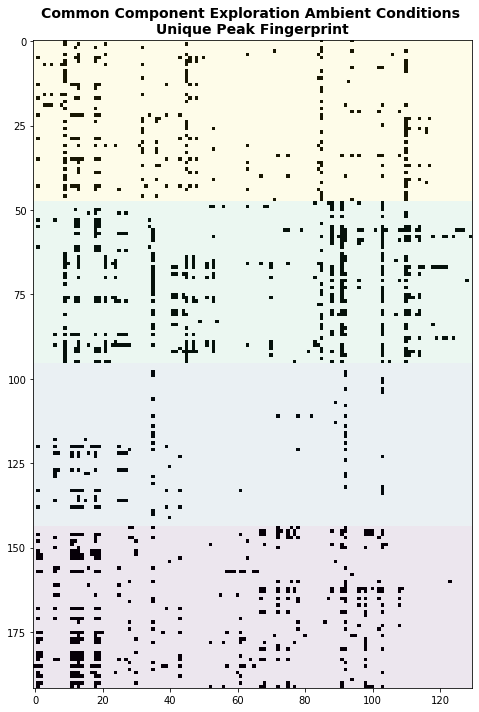

In [10]:
#barcodes_rt, arr_rt = gen_barcodes(ue_list_rt, count_rt)
barcodes_rt, arr_rt = gen_barcodes(ue_rt, count_rt)

#data for colored overlay
n_components = arr_rt.shape[1]

a = np.empty((48,n_components))
a.fill(1)
b = np.empty((48,n_components))
b.fill(2)
c = np.empty((48,n_components))
c.fill(3)
d = np.empty((48,n_components))
d.fill(4)

comb = np.concatenate((a,b,c,d))

#imshow
fig = plt.figure(figsize=(14,10))
plt.imshow(arr_rt, 'binary')
plt.imshow(comb,'viridis_r', alpha=0.1)
plt.title("Common Component Exploration Ambient Conditions \nUnique Peak Fingerprint", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('output_interpretation//CCE_Unique Peaks Fingerprint_rt.png')

### NMF

In [11]:
mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    means, lows, highs, errors = component_range('nmf',arr_rt, 10, 48, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


In [12]:
# get average means and errors (along with errorbar ranges)
cce1_rt_mean, cce1_rt_min, cce1_rt_max = average_results(mean_values[0], 48)
cce1_rt_err, cce1_rt_err_min, cce1_rt_err_max = average_results(rec_errors[0], 48)
cce2_rt_mean, cce2_rt_min, cce2_rt_max = average_results(mean_values[1], 48)
cce2_rt_err, cce2_rt_err_min, cce2_rt_err_max = average_results(rec_errors[1], 48)
cce3_rt_mean, cce3_rt_min, cce3_rt_max = average_results(mean_values[2], 48)
cce3_rt_err, cce3_rt_err_min, cce3_rt_err_max = average_results(rec_errors[2], 48)
cce4_rt_mean, cce4_rt_min, cce4_rt_max = average_results(mean_values[3], 48)
cce4_rt_err, cce4_rt_err_min, cce4_rt_err_max = average_results(rec_errors[3], 48)

10 48
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.3893769269332517, 0.389376926933251, 0.3893769269332514, 0.3893769269332512, 0.38937692693325143, 0.389376926933251, 0.3893769269332512, 0.38937692693325116, 0.3893769269332514, 0.3893769269332512]
10 48
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.5572119476120915, 0.5572119475772425, 0.5572119476352282, 0.5572119476376537, 0.5572119476452068, 0.5572119476636673, 0.5572119475809297, 0.5572119475503651, 0.5572119476349636, 0.5572119475330425]
10 48
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.7661540065237444, 0.7661539759338277, 0.7661539768479585, 0.7661539770560694, 0.766153978391991, 0.7661539747636802, 0.7661539766890844, 0.7661539767437264, 0.7661539773655924, 0.7661539797852653]
10 48
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [0.9340352643591996, 0.9340353267504944, 0.9340354648664712, 0.9340351961087713, 0.9340350966437067, 0.9340353173007111, 0.934035593052032, 0.9340347483469008, 0.9340352377564022, 0.93403530

av: [4.843216457893769, 4.843216470850286, 4.8432165632654876, 4.843216421250605, 4.843216400576129, 4.843216626480006, 4.843216288814037, 4.843216300742158, 4.843216469052639, 4.843216491840388]
10 48
0 16
1 16
2 16
3 16
4 16
5 16
6 16
7 16
8 16
9 16


av: [4.4982660526805835, 4.498266027214885, 4.498266061160475, 4.498265986606966, 4.4982660411272315, 4.498266022554277, 4.498266048155494, 4.498266024289011, 4.498266047947172, 4.4982660260602]
10 48
0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17


av: [4.229735873494641, 4.229735813180782, 4.2297358753863215, 4.229735875816495, 4.229735925426882, 4.229735883108179, 4.229735913964905, 4.229735820962453, 4.229735872676356, 4.2297358786549655]
10 48
0 18
1 18
2 18
3 18
4 18
5 18
6 18
7 18
8 18
9 18


av: [4.024083607357707, 4.024085150677739, 4.024084892365491, 4.024081805439674, 4.0240828250952685, 4.024078048006292, 4.02408691166149, 4.0240861569471, 4.024089530657141, 4.024092241991918]
10 48
0 19
1 19
2 19
3 19
4 19
5 19
6 19
7 19

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30


av: [1.7184368183176506, 1.718376422826091, 1.7184289393979484, 1.7183886446666632, 1.7184114480840507, 1.71844247422149, 1.7183860136901952, 1.718412694287941, 1.7184033707190156, 1.7184291655904662]
10 48
0 31
1 31
2 31
3 31
4 31
5 31
6 31
7 31
8 31
9 31


av: [1.8078858343657487, 1.8078858337688963, 1.8078886477815335, 1.8078855942654426, 1.8078854960375186, 1.8078854601136978, 1.8078865424345754, 1.8078849410241327, 1.8078863787949686, 1.8078859485159606]
10 48
0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 32
9 32


av: [1.823400320668329, 1.823400278112417, 1.8234002617151326, 1.8234003606042055, 1.8234004769799295, 1.8234003335685405, 1.8234002408949355, 1.8234002997302987, 1.823400320054504, 1.8234003100610365]
10 48
0 33
1 33
2 33
3 33
4 33
5 33
6 33
7 33
8 33
9 33


av: [1.8480974065716325, 1.8480974065716131, 1.848097406571626, 1.848097406571652, 1.8480974065716425, 1.8480974065716775, 1.8480974065716393, 1.848097406571659, 1.8480974



av: [0.9829079501341247, 0.9829079501341379, 0.982907950134128, 0.9829079501341293, 0.982907950134129, 0.9829079501341274, 0.9829079501341326, 0.9829079501341267, 0.9829079501341281, 0.9829079501341209]
10 48
0 47
1 47
2 47
3 47
4 47
5 47
6 47
7 47
8 47
9 47


av: [0.9829079501341318, 0.9829079501341204, 0.9829079501341316, 0.982907950134129, 0.9829079501341236, 0.982907950134122, 0.9829079501341224, 0.9829079501341268, 0.9829079501341317, 0.9829079501341192]
10 48
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.16379105722114848, 0.16379105722114848, 0.1637910572211484, 0.1637910572211485, 0.1637910572211486, 0.16379105722114842, 0.16379105722114848, 0.16379105722114842, 0.16379105722114862, 0.16379105722114848]
10 48
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.34226817879329596, 0.3422681787931701, 0.3422681787935684, 0.34226817879381305, 0.3422681787947293, 0.3422681787934559, 0.34226817879384797, 0.34226817879161847, 0.34226817879654464, 0.34226817879170474]
10 48
0 2
1 2
2

8 25
9 25


av: [0.0028017069700190084, 0.0028017069700187348, 0.0028017069700190396, 0.0028017069700189815, 0.002801706970018976, 0.002801706970019106, 0.0028017069700187985, 0.00280170697001886, 0.0028017069700189546, 0.0028017069700191828]
10 48
0 26
1 26
2 26
3 26
4 26
5 26
6 26
7 26
8 26
9 26


av: [0.0028017069700189716, 0.002801706970019031, 0.0028017069700187885, 0.002801706970019082, 0.0028017069700186996, 0.0028017069700188913, 0.0028017069700187586, 0.0028017069700190787, 0.0028017069700189863, 0.0028017069700186736]
10 48
0 27
1 27
2 27
3 27
4 27
5 27
6 27
7 27
8 27
9 27


av: [0.0028017069700189226, 0.0028017069700188714, 0.0028017069700185734, 0.002801706970019081, 0.002801706970018898, 0.002801706970019027, 0.002801706970019027, 0.0028017069700191975, 0.002801706970018968, 0.0028017069700190128]
10 48
0 28
1 28
2 28
3 28
4 28
5 28
6 28
7 28
8 28
9 28


av: [0.002801706970018798, 0.0028017069700192465, 0.0028017069700193506, 0.0028017069700190505, 0.0028017069700189477, 0

av: [1.7554954368551783, 1.755495436855231, 1.7554954368552174, 1.755495436855225, 1.7554954368552071, 1.755495436855206, 1.7554954368551847, 1.7554954368552684, 1.755495436855199, 1.7554954368552311]
10 48
0 38
1 38
2 38
3 38
4 38
5 38
6 38
7 38
8 38
9 38


av: [1.68663129465914, 1.6866312946591275, 1.6866312946591275, 1.6866312946591033, 1.686631294659146, 1.6866312946591424, 1.6866312946591073, 1.6866312946591118, 1.6866312946591222, 1.6866312946591016]
10 48
0 39
1 39
2 39
3 39
4 39
5 39
6 39
7 39
8 39
9 39


av: [1.76984839150139, 1.7698483915014036, 1.7698483915013938, 1.7698483915013838, 1.7698483915013636, 1.7698483915014187, 1.7698483915014023, 1.7698483915013714, 1.7698483915013838, 1.7698483915014063]
10 48
0 40
1 40
2 40
3 40
4 40
5 40
6 40
7 40
8 40
9 40


av: [1.7451502481904153, 1.7451502481904042, 1.7451502481904164, 1.7451502481904224, 1.7451502481904415, 1.7451502481904406, 1.745150248190426, 1.7451502481904135, 1.7451502481904437, 1.7451502481903998]
10 48
0 41
1 41


In [13]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_rt_mean, color='mediumturquoise', zorder=2, label='Run 1')
#ax[0].fill_between(np.arange(1,48,1), cce1_rt_min, cce1_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_rt_mean, color='darkcyan', zorder=2, label='Run 2')
#ax[0].fill_between(np.arange(1,48,1), cce2_rt_min, cce2_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_rt_mean, color='dodgerblue', zorder=2, label='Run 3')
#ax[0].fill_between(np.arange(1,48,1), cce3_rt_min, cce3_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_rt_mean, color='blue', zorder=2, label='Run 4')
#ax[0].fill_between(np.arange(1,48,1), cce4_rt_min, cce4_rt_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1),cce1_rt_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_rt_err_min, cce1_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce2_rt_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_rt_err_min, cce2_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce3_rt_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_rt_err_min, cce3_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce4_rt_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_rt_err_min, cce4_rt_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([37,37], [y11,17.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  37',xy=(37-4.7,16.5), color='grey', fontweight='bold')
ax.plot([45,45], [y11,15.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  45',xy=(45-4.7,14.5), color='grey', fontweight='bold')
ax.plot([17,17], [y11,13.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  17',xy=(17-4.7,12.5), color='grey', fontweight='bold')
ax.plot([42,42], [y11,11.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  42',xy=(42-4.7,10.5), color='grey', fontweight='bold')

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Ambient Conditions | NMF Reconstruction Error', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_rt.png')

### PCA

In [14]:
variance = []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    model_ = PCA(n_components=48)
    X = model_.fit_transform(arr_rt[i:j])
    err = model_.explained_variance_#ratio_
    #print(model_.explained_variance_, model_.explained_variance_ratio_, '\n')
    
    variance.append(err)
    
cce1_rt_err = [np.log(x) for x in variance[0]]
cce1_rt_err2 = variance[0]
cce1_rt_err_min, cce1_rt_err_max = cce1_rt_err, cce1_rt_err
cce2_rt_err = [np.log(x) for x in variance[1]]
cce2_rt_err2 = variance[1]
cce2_rt_err_min, cce2_rt_err_max = cce2_rt_err, cce2_rt_err
cce3_rt_err = [np.log(x) for x in variance[2]]
cce3_rt_err2 = variance[2]
cce3_rt_err_min, cce3_rt_err_max = cce3_rt_err, cce3_rt_err
cce4_rt_err = [np.log(x) for x in variance[3]]
cce4_rt_err2 = variance[3]
cce4_rt_err_min, cce4_rt_err_max = cce4_rt_err, cce4_rt_err

#df = pd.DataFrame(variance)
#df.T

In [15]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_rt_err2, color='mediumturquoise', zorder=2, label='Run 1')
#ax.fill_between(np.arange(1,49,1), cce1_rt_err_min, cce1_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_rt_err2, color='darkcyan', zorder=2, label='Run 2')
#ax.fill_between(np.arange(1,49,1), cce2_rt_err_min, cce2_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_rt_err2, color='dodgerblue', zorder=2, label='Run 3')
#ax.fill_between(np.arange(1,49,1), cce3_rt_err_min, cce3_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_rt_err2, color='blue', zorder=2, label='Run 4')
#ax.fill_between(np.arange(1,49,1), cce4_rt_err_min, cce4_rt_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
adj = 4.3
ax.plot([38,38], [y11,5.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  38',xy=(38-4.7,5.3/adj), color='grey', fontweight='bold')
ax.plot([44,44], [y11,4.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  44',xy=(44-4.7,4.3/adj), color='grey', fontweight='bold')
ax.plot([17,17], [y11,3.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  17',xy=(17-4.7,3.3/adj), color='grey', fontweight='bold')
ax.plot([42,42], [y11,2.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  42',xy=(42-4.7,2.3/adj), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration Ambient Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Ambient Conditions | PCA Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA explained variance_rt.png')

In [16]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_rt_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_rt_err_min, cce1_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_rt_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_rt_err_min, cce2_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_rt_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_rt_err_min, cce3_rt_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_rt_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_rt_err_min, cce4_rt_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Natural Log of Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([38,38], [y11,15], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  38',xy=(38-4.7,13), color='grey', fontweight='bold')
ax.plot([44,44], [y11,10], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  44',xy=(44-4.7,8), color='grey', fontweight='bold')
ax.plot([17,17], [y11,5], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  17',xy=(17-4.7,3), color='grey', fontweight='bold')
ax.plot([42,42], [y11,0], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  42',xy=(42-4.7,-2), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration Ambient Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Ambient Conditions | PCA Log Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA log explained variance_rt.png')

## Warm Conditions

In [17]:
#barcodes_50, arr_50 = gen_barcodes(ue_list_50, count_50)
barcodes_50, arr_50 = gen_barcodes(ue_50, count_50)

#data for colored overlay
n_components = arr_50.shape[1]

a = np.empty((48,n_components))
a.fill(1)
b = np.empty((48,n_components))
b.fill(2)
c = np.empty((48,n_components))
c.fill(3)
d = np.empty((48,n_components))
d.fill(4)

comb = np.concatenate((a,b,c,d))

#imshow
fig = plt.figure(figsize=(14,10))
plt.imshow(arr_50, 'binary')
plt.imshow(comb,'viridis_r', alpha=0.1)
plt.title("Common Component Exploration Warm Conditions \nUnique Peak Fingerprint", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('output_interpretation//CCE_Unique Peaks Fingerprint_50.png')

### NMF

In [18]:
mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    means, lows, highs, errors = component_range('nmf', arr_50, 10, 48, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


9


In [19]:
# get average means and errors (along with errorbar ranges)
cce1_50_mean, cce1_50_min, cce1_50_max = average_results(mean_values[0], 48)
cce1_50_err, cce1_50_err_min, cce1_50_err_max = average_results(rec_errors[0], 48)
cce2_50_mean, cce2_50_min, cce2_50_max = average_results(mean_values[1], 48)
cce2_50_err, cce2_50_err_min, cce2_50_err_max = average_results(rec_errors[1], 48)
cce3_50_mean, cce3_50_min, cce3_50_max = average_results(mean_values[2], 48)
cce3_50_err, cce3_50_err_min, cce3_50_err_max = average_results(rec_errors[2], 48)
cce4_50_mean, cce4_50_min, cce4_50_max = average_results(mean_values[3], 48)
cce4_50_err, cce4_50_err_min, cce4_50_err_max = average_results(rec_errors[3], 48)

10 48
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.3738692845443213, 0.373869284544321, 0.37386928454432033, 0.373869284544321, 0.37386928454432056, 0.37386928454432083, 0.3738692845443203, 0.37386928454432056, 0.3738692845443207, 0.3738692845443208]
10 48
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.5866412054428551, 0.5866412055172966, 0.5866412052793842, 0.5866412054594171, 0.5866412055196155, 0.5866412054367388, 0.586641205695716, 0.5866412055152245, 0.5866412056317065, 0.5866412054878429]
10 48
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.78996458545584, 0.7899645858495964, 0.7899645860565535, 0.7899645849230098, 0.7899645875157688, 0.7899645844934532, 0.7899645851813414, 0.7899645861747363, 0.7899645832275611, 0.7899645845285789]
10 48
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [0.9451087577573198, 0.9451087522028688, 0.945108878933952, 0.945108739739439, 0.9451092150169694, 0.9451087811757093, 0.9451087800821366, 0.9451088001985637, 0.9451088322502098, 0.945108925

av: [4.896895478182233, 4.896898353516074, 4.896898396141168, 4.89689829715287, 4.8968954856976925, 4.896898351982311, 4.896895431718698, 4.8968983816081115, 4.8968983195543645, 4.896895454513296]
10 48
0 16
1 16
2 16
3 16
4 16
5 16
6 16
7 16
8 16
9 16


av: [4.47209485407519, 4.472090961193634, 4.472094795048882, 4.472113852183819, 4.472107406618046, 4.47209632050413, 4.472090484250942, 4.472099225971405, 4.472089112571904, 4.47209910045459]
10 48
0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17


av: [4.2473243107864365, 4.247447237277976, 4.247548932902122, 4.24756425232136, 4.247437670461933, 4.246879201731538, 4.247469160683419, 4.247604025589453, 4.247559823602052, 4.247551429191516]
10 48
0 18
1 18
2 18
3 18
4 18
5 18
6 18
7 18
8 18
9 18


av: [4.077235702234302, 4.077234073703644, 4.077236833574069, 4.077236596319871, 4.077232307791927, 4.077226640812146, 4.077237102108622, 4.077238138900296, 4.077233409869815, 4.077235792499772]
10 48
0 19
1 19
2 19
3 19
4 19
5 19
6 19
7 19
8

av: [1.5463662442319654, 1.5463811154706513, 1.5463638482775899, 1.5463848214991078, 1.5463702261488912, 1.5463850039427456, 1.5463697014396407, 1.5463731436972552, 1.5463656795433287, 1.5463736098511591]
10 48
0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30


av: [1.5585159922381007, 1.5585184986873806, 1.5585155899231473, 1.5585164919339345, 1.5585153681416912, 1.558517333792074, 1.5585153161066112, 1.5585170835164917, 1.5585098555636827, 1.5585139136303943]
10 48
0 31
1 31
2 31
3 31
4 31
5 31
6 31
7 31
8 31
9 31


av: [1.5189940879255677, 1.5189941835933904, 1.518994090169107, 1.5189946376573502, 1.5189946578440727, 1.518994132332163, 1.5189947176993677, 1.5189945700207155, 1.5189945732306986, 1.5189950432367632]
10 48
0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 32
9 32


av: [1.5745000280212658, 1.5744998543741258, 1.5744997939672356, 1.5744998908911356, 1.574499770113088, 1.574499892328845, 1.5744996954251318, 1.5744998425030765, 1.5744999129540485, 1.574499820213421]
10 48
0 33
1

5 45
6 45
7 45
8 45
9 45


av: [1.0468265830821106, 1.0468265830821104, 1.0468265830821115, 1.0468265830821117, 1.046826583082107, 1.0468265830821082, 1.0468265830821113, 1.0468265830821075, 1.0468265830821064, 1.0468265830821106]
10 48
0 46
1 46
2 46
3 46
4 46
5 46
6 46
7 46
8 46
9 46


av: [1.04682658308211, 1.0468265830821124, 1.0468265830821069, 1.0468265830821075, 1.0468265830821086, 1.0468265830821128, 1.0468265830821075, 1.046826583082109, 1.046826583082105, 1.0468265830821086]
10 48
0 47
1 47
2 47
3 47
4 47
5 47
6 47
7 47
8 47
9 47


av: [1.046826583082108, 1.0468265830821089, 1.0468265830821049, 1.0468265830821073, 1.046826583082106, 1.0468265830821106, 1.0468265830821075, 1.0468265830821082, 1.0468265830821057, 1.0468265830821095]
10 48
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.229840391808022, 0.22984039180802177, 0.22984039180802193, 0.22984039180802204, 0.2298403918080222, 0.22984039180802193, 0.229840391808022, 0.22984039180802207, 0.22984039180802207, 0.2298403918

av: [4.630990046476585, 4.630996453205987, 4.631001906244469, 4.630999074391855, 4.630994481194259, 4.631000730865304, 4.631005827697843, 4.631002012133058, 4.631006170207314, 4.631002725121525]
10 48
0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13


av: [4.387828432807924, 4.387828968959085, 4.387829041464164, 4.387828649381931, 4.387828747886089, 4.387829045382486, 4.3878291530880995, 4.387828851773248, 4.387829139764327, 4.3878289046711]
10 48
0 14
1 14
2 14
3 14
4 14
5 14
6 14
7 14
8 14
9 14


av: [4.101002220591036, 4.101002147655026, 4.101002511670817, 4.101002005358491, 4.101002169448553, 4.101002159111148, 4.1010022104045945, 4.101002166956569, 4.101002440222211, 4.101002023202259]
10 48
0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15


av: [3.8239329855743884, 3.823932929763638, 3.823932925527857, 3.8239329089024023, 3.8239329650957696, 3.823932864304909, 3.823933056881818, 3.8239329697097215, 3.8239329327479488, 3.8239329322209783]
10 48
0 16
1 16
2 16
3 16
4 16
5 16
6 16

av: [1.5262720618022003, 1.5262864187243836, 1.5264141092989145, 1.5264587754842485, 1.5266989366844337, 1.5259263000316992, 1.5262585259482073, 1.5261706892215312, 1.5260588355717928, 1.5261233588410128]
10 48
0 27
1 27
2 27
3 27
4 27
5 27
6 27
7 27
8 27
9 27


av: [1.5757262978346844, 1.5757798275967911, 1.5758773127109895, 1.5758367123704875, 1.5757702998419465, 1.575759648363687, 1.575750448046654, 1.5758138177840368, 1.5759410462945915, 1.5758023511283012]
10 48
0 28
1 28
2 28
3 28
4 28
5 28
6 28
7 28
8 28
9 28


av: [1.6383380190732781, 1.6384128200376062, 1.6384663368981587, 1.6385102687217614, 1.6387123596390625, 1.6384075345898177, 1.638540776203861, 1.6378180621318095, 1.6384649722667728, 1.6381977774704548]
10 48
0 29
1 29
2 29
3 29
4 29
5 29
6 29
7 29
8 29
9 29


av: [1.714845501331091, 1.71515702097712, 1.715103722588944, 1.7150758577394498, 1.7150761028100252, 1.7151518287975887, 1.715037236447249, 1.7151664424674795, 1.7150692858072123, 1.7150656006022977]
10 48
0 30
1 3

av: [1.4591362386738813, 1.4591362386738806, 1.459136238673881, 1.459136238673881, 1.459136238673882, 1.4591362386738806, 1.4591362386738806, 1.4591362386738806, 1.4591362386738809, 1.4591362386738815]
10 48
0 43
1 43
2 43
3 43
4 43
5 43
6 43
7 43
8 43
9 43


av: [1.130186533210912, 1.1301865332109118, 1.1301865332108922, 1.13018653321091, 1.1301865332109091, 1.1301865332109189, 1.1301865332109187, 1.1301865332109102, 1.1301865332109287, 1.1301865332109182]
10 48
0 44
1 44
2 44
3 44
4 44
5 44
6 44
7 44
8 44
9 44


av: [1.0051049773798384, 1.005104977379835, 1.0051049773798277, 1.0051049773798248, 1.0051049773798382, 1.0051049773798193, 1.0051049773798184, 1.0051049773798377, 1.005104977379827, 1.0051049773798255]
10 48
0 45
1 45
2 45
3 45
4 45
5 45
6 45
7 45
8 45
9 45


av: [0.8561861970282132, 0.8561861970282129, 0.8561861970282129, 0.8561861970282115, 0.8561861970282123, 0.8561861970282167, 0.8561861970282144, 0.856186197028213, 0.8561861970282133, 0.856186197028214]
10 48
0 46
1 46


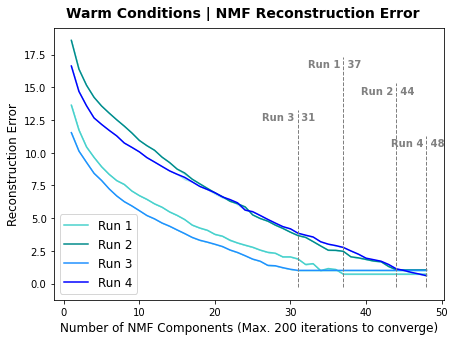

In [20]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1),cce1_50_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_50_err_min, cce1_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce2_50_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_50_err_min, cce2_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce3_50_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_50_err_min, cce3_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce4_50_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_50_err_min, cce4_50_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([37,37], [y11,17.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  37',xy=(37-4.7,16.5), color='grey', fontweight='bold')
ax.plot([44,44], [y11,15.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  44',xy=(44-4.7,14.5), color='grey', fontweight='bold')
ax.plot([31,31], [y11,13.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  31',xy=(31-4.7,12.5), color='grey', fontweight='bold')
ax.plot([48,48], [y11,11.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  48',xy=(48-4.7,10.5), color='grey', fontweight='bold')


# plot Absolute W Matrix Agreement
#ax[1].plot(np.arange(1,48,1),cce1_50_mean, color='mediumturquoise', zorder=2, label='CCE_1')
#ax[1].fill_between(np.arange(1,48,1), cce1_50_min, cce1_50_max, color='paleturquoise', zorder=1)
#ax[1].plot(np.arange(1,48,1),cce2_50_mean, color='darkcyan', zorder=2, label='CCE_2')
#ax[1].fill_between(np.arange(1,48,1), cce2_50_min, cce2_50_max, color='paleturquoise', zorder=1)
#ax[1].plot(np.arange(1,48,1),cce3_50_mean, color='dodgerblue', zorder=2, label='CCE_3')
#ax[1].fill_between(np.arange(1,48,1), cce3_50_min, cce3_50_max, color='paleturquoise', zorder=1)
#ax[1].plot(np.arange(1,48,1),cce4_50_mean, color='blue', zorder=2, label='CCE_4')
#ax[1].fill_between(np.arange(1,48,1), cce4_50_min, cce4_50_max, color='paleturquoise', zorder=1)

#ax[1].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[1].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)



# legends, titles
ax.legend(fontsize=12, loc = 'lower left')
#fig.suptitle('Common Component Exploration Warm Conditions\nReconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Warm Conditions | NMF Reconstruction Error', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_50.png')

### PCA

In [21]:
variance = []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    model_ = PCA(n_components=48)
    X = model_.fit_transform(arr_50[i:j])
    err = model_.explained_variance_#ratio_
    #print(model_.explained_variance_, model_.explained_variance_ratio_, '\n')
    
    variance.append(err)
    
cce1_50_err = [np.log(x) for x in variance[0]]
cce1_50_err2 = variance[0]
cce1_50_err_min, cce1_50_err_max = cce1_50_err, cce1_50_err
cce2_50_err = [np.log(x) for x in variance[1]]
cce2_50_err2 = variance[1]
cce2_50_err_min, cce2_50_err_max = cce2_50_err, cce2_50_err
cce3_50_err = [np.log(x) for x in variance[2]]
cce3_50_err2 = variance[2]
cce3_50_err_min, cce3_50_err_max = cce3_50_err, cce3_50_err
cce4_50_err = [np.log(x) for x in variance[3]]
cce4_50_err2 = variance[3]
cce4_50_err_min, cce4_50_err_max = cce4_50_err, cce4_50_err

#df = pd.DataFrame(variance)
#df.T

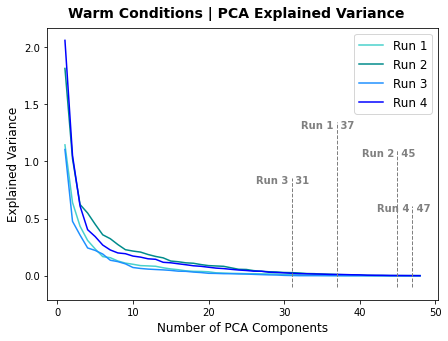

In [22]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_50_err2, color='mediumturquoise', zorder=2, label='Run 1')
#ax.fill_between(np.arange(1,49,1), cce1_50_err_min, cce1_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_50_err2, color='darkcyan', zorder=2, label='Run 2')
#ax.fill_between(np.arange(1,49,1), cce2_50_err_min, cce2_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_50_err2, color='dodgerblue', zorder=2, label='Run 3')
#ax.fill_between(np.arange(1,49,1), cce3_50_err_min, cce3_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_50_err2, color='blue', zorder=2, label='Run 4')
#ax.fill_between(np.arange(1,49,1), cce4_50_err_min, cce4_50_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
adj = 4.1
ax.plot([37,37], [y11,5.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  37',xy=(37-4.7,5.3/adj), color='grey', fontweight='bold')
ax.plot([45,45], [y11,4.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  45',xy=(45-4.7,4.3/adj), color='grey', fontweight='bold')
ax.plot([31,31], [y11,3.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  31',xy=(31-4.7,3.3/adj), color='grey', fontweight='bold')
ax.plot([47,47], [y11,2.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  47',xy=(47-4.7,2.3/adj), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration Warm Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Warm Conditions | PCA Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA explained variance_50.png')

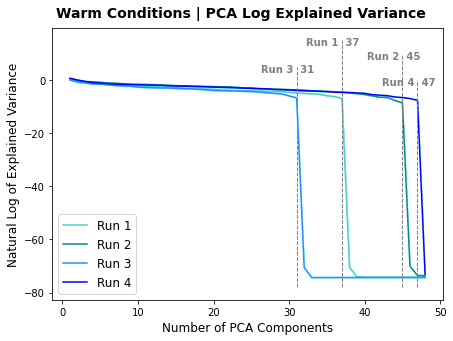

In [23]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_50_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_50_err_min, cce1_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_50_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_50_err_min, cce2_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_50_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_50_err_min, cce3_50_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_50_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_50_err_min, cce4_50_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Natural Log of Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([37,37], [y11,15], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  37',xy=(37-4.7,13), color='grey', fontweight='bold')
ax.plot([45,45], [y11,10], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  45',xy=(45-4.7,8), color='grey', fontweight='bold')
ax.plot([31,31], [y11,5], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  31',xy=(31-4.7,3), color='grey', fontweight='bold')
ax.plot([47,47], [y11,0], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  47',xy=(47-4.7,-2), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration Warm Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Warm Conditions | PCA Log Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA log explained variance_50.png')

## Solvothermal Conditions

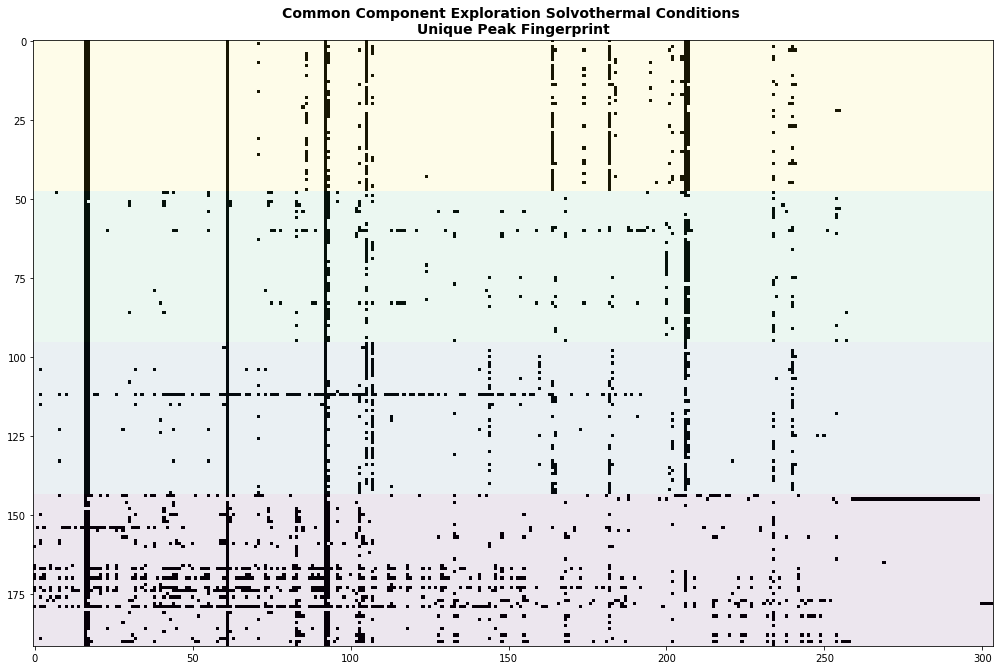

In [24]:
#barcodes_ST, arr_ST = gen_barcodes(ue_list_ST, count_ST)
barcodes_ST, arr_ST = gen_barcodes(ue_ST, count_ST)

#data for colored overlay
n_components = arr_ST.shape[1]

a = np.empty((48,n_components))
a.fill(1)
b = np.empty((48,n_components))
b.fill(2)
c = np.empty((48,n_components))
c.fill(3)
d = np.empty((48,n_components))
d.fill(4)

comb = np.concatenate((a,b,c,d))

#imshow
fig = plt.figure(figsize=(14,10))
plt.imshow(arr_ST, 'binary')
plt.imshow(comb,'viridis_r', alpha=0.1)
plt.title("Common Component Exploration Solvothermal Conditions \nUnique Peak Fingerprint", fontsize=14, fontweight='bold')

# save figure
plt.tight_layout()
plt.savefig('output_interpretation//CCE_Unique Peaks Fingerprint_ST.png')

### NMF

In [25]:
mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    means, lows, highs, errors = component_range('nmf', arr_ST, 10, 48, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)
    
# get average means and errors (along with errorbar ranges)
cce1_ST_mean, cce1_ST_min, cce1_ST_max = average_results(mean_values[0], 48)
cce1_ST_err, cce1_ST_err_min, cce1_ST_err_max = average_results(rec_errors[0], 48)
cce2_ST_mean, cce2_ST_min, cce2_ST_max = average_results(mean_values[1], 48)
cce2_ST_err, cce2_ST_err_min, cce2_ST_err_max = average_results(rec_errors[1], 48)
cce3_ST_mean, cce3_ST_min, cce3_ST_max = average_results(mean_values[2], 48)
cce3_ST_err, cce3_ST_err_min, cce3_ST_err_max = average_results(rec_errors[2], 48)
cce4_ST_mean, cce4_ST_min, cce4_ST_max = average_results(mean_values[3], 48)
cce4_ST_err, cce4_ST_err_min, cce4_ST_err_max = average_results(rec_errors[3], 48)

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


9
10 48
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.6482059358248602, 0.6482059358248594, 0.6482059358248594, 0.6482059358248594, 0.6482059358248596, 0.6482059358248607, 0.6482059358248602, 0.6482059358248601, 0.6482059358248602, 0.6482059358248601]
10 48
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.8745170110173147, 0.874517011164214, 0.8745170109706614, 0.8745170109685146, 0.8745170110077373, 0.8745170110352328, 0.8745170111305162, 0.8745170110212529, 0.8745170109706893, 0.8745170110091537]
10 48
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.8835774838682795, 0.8835774838154288, 0.8835774838445211, 0.8835774837961177, 0.8835774838286578, 0.8835774838478366, 0.8835774838842266, 0.8835774838007667, 0.8835774838400878, 0.8835774837315723]
10 48
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [1.197697743111891, 1.197697742626553, 1.1976977427211588, 1.1976977426592195, 1.1976977433521647, 1.197697742732318, 1.1976977426417026, 1.197697742640528, 1.1976977426581215, 1.197697743

av: [2.381530447724484, 2.381530447724477, 2.381530447724483, 2.3815304477244745, 2.381530447724473, 2.3815304477244776, 2.381530447724477, 2.3815304477244723, 2.381530447724461, 2.3815304477244768]
10 48
0 16
1 16
2 16
3 16
4 16
5 16
6 16
7 16
8 16
9 16


av: [2.168111330150647, 2.1681113301506554, 2.168111330150652, 2.168111330150659, 2.16811133015065, 2.168111330150655, 2.1681113301506554, 2.168111330150651, 2.1681113301506594, 2.168111330150651]
10 48
0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17


av: [1.8245942695127788, 1.824594269512778, 1.8245942695127768, 1.8245942695127786, 1.8245942695127775, 1.8245942695127773, 1.8245942695127781, 1.8245942695127775, 1.8245942695127764, 1.8245942695127786]
10 48
0 18
1 18
2 18
3 18
4 18
5 18
6 18
7 18
8 18
9 18


av: [1.3233745177881657, 1.3233745177881657, 1.3233745177881655, 1.3233745177881653, 1.3233745177881655, 1.3233745177881653, 1.3233745177881657, 1.3233745177881655, 1.3233745177881657, 1.3233745177881655]
10 48
0 19
1 19
2 19


av: [1.2856010976786447, 1.2856010976786587, 1.2856010976786554, 1.285601097678664, 1.2856010976786623, 1.2856010976786612, 1.2856010976786547, 1.285601097678654, 1.2856010976786598, 1.2856010976786476]
10 48
0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30


av: [1.3623449355520723, 1.362344935552078, 1.3623449355520882, 1.3623449355520834, 1.3623449355520922, 1.3623449355520953, 1.3623449355520825, 1.3623449355520814, 1.3623449355520796, 1.3623449355520727]
10 48
0 31
1 31
2 31
3 31
4 31
5 31
6 31
7 31
8 31
9 31


av: [1.462812687315109, 1.4628126873150993, 1.4628126873150993, 1.4628126873150797, 1.4628126873151037, 1.4628126873150993, 1.4628126873150873, 1.4628126873150944, 1.4628126873151022, 1.4628126873151166]
10 48
0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 32
9 32


av: [1.4628126873151075, 1.4628126873150418, 1.4628126873151093, 1.4628126873151057, 1.4628126873150868, 1.4628126873151002, 1.4628126873150948, 1.4628126873150944, 1.4628126873150968, 1.4628126873151117]
10 48
0 33

av: [0.48013923728816976, 0.4801392372881708, 0.4801392372881703, 0.48013923728817065, 0.4801392372881712, 0.48013923728817043, 0.480139237288172, 0.4801392372881719, 0.48013923728817165, 0.48013923728817]
10 48
0 45
1 45
2 45
3 45
4 45
5 45
6 45
7 45
8 45
9 45


av: [0.4801392372881723, 0.48013923728817065, 0.48013923728817076, 0.4801392372881707, 0.4801392372881714, 0.4801392372881729, 0.4801392372881698, 0.4801392372881704, 0.48013923728817093, 0.48013923728817015]
10 48
0 46
1 46
2 46
3 46
4 46
5 46
6 46
7 46
8 46
9 46


av: [0.4801392372881707, 0.4801392372881706, 0.4801392372881723, 0.4801392372881709, 0.4801392372881717, 0.4801392372881735, 0.48013923728817093, 0.48013923728816965, 0.4801392372881711, 0.4801392372881702]
10 48
0 47
1 47
2 47
3 47
4 47
5 47
6 47
7 47
8 47
9 47


av: [0.48013923728817115, 0.48013923728816954, 0.48013923728817076, 0.4801392372881731, 0.48013923728817043, 0.4801392372881708, 0.4801392372881706, 0.4801392372881713, 0.48013923728817215, 0.480139237288

av: [6.20448376048252, 6.204484300801836, 6.204483714658613, 6.204483736892395, 6.204483766893781, 6.204483703890327, 6.204483804238932, 6.204483746167914, 6.204483709106439, 6.2044839025772385]
10 48
0 12
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12


av: [5.869129907581192, 5.869129789026204, 5.8691297210466455, 5.869129734306666, 5.869129798323982, 5.869129747030964, 5.869129883994709, 5.869129733306179, 5.869129716196387, 5.869129835586852]
10 48
0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13


av: [5.431020299048285, 5.43102031661453, 5.4310201507307605, 5.431020112233994, 5.431019121746225, 5.431020141292614, 5.431020616133255, 5.431020285637404, 5.431020149793744, 5.431019924141169]
10 48
0 14
1 14
2 14
3 14
4 14
5 14
6 14
7 14
8 14
9 14


av: [5.258616237332062, 5.258609526172706, 5.258611139546348, 5.258613056745292, 5.258601936675096, 5.258615061090462, 5.258609111156165, 5.25860945524601, 5.258606829793431, 5.258612071817281]
10 48
0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15


av: [2.0318133128929583, 2.0315792606449428, 2.0316142475187378, 2.0320393506319996, 2.0321210521939075, 2.032251994799481, 2.0317548881458545, 2.0318899837205944, 2.0314499638967973, 2.0319883500460203]
10 48
0 26
1 26
2 26
3 26
4 26
5 26
6 26
7 26
8 26
9 26


av: [1.9815168997314065, 1.9813927530048303, 1.9815236758819914, 1.981557271857545, 1.9814302823451815, 1.9817751283232141, 1.9815713133130906, 1.9813544328392882, 1.981550105955084, 1.9803895665544555]
10 48
0 27
1 27
2 27
3 27
4 27
5 27
6 27
7 27
8 27
9 27


av: [2.075117371345368, 2.0751536761571887, 2.0757049312028766, 2.0760211055830373, 2.075129105606401, 2.0755128161113405, 2.0755131079234546, 2.0757518576546787, 2.0748912950346035, 2.0751611611742695]
10 48
0 28
1 28
2 28
3 28
4 28
5 28
6 28
7 28
8 28
9 28


av: [2.076441452055273, 2.076509581141602, 2.076409309984696, 2.0767008135987743, 2.0247808987269766, 2.0767822577462973, 2.0768471883417807, 2.0767370734593507, 2.076109904876498, 2.076722719220337]
10 48
0 29
1 29


av: [2.435252317766153, 2.4352523177661514, 2.4352523177661602, 2.435252317766156, 2.4352523177661487, 2.4352523177661674, 2.435252317766158, 2.435252317766161, 2.435252317766157, 2.4352523177661696]
10 48
0 42
1 42
2 42
3 42
4 42
5 42
6 42
7 42
8 42
9 42


av: [2.3666363322197035, 2.366636332219909, 2.366636332219988, 2.366636332220003, 2.366636332219897, 2.366636332219895, 2.3666363322198474, 2.366636332219944, 2.3666363322198407, 2.366636332219853]
10 48
0 43
1 43
2 43
3 43
4 43
5 43
6 43
7 43
8 43
9 43


av: [1.8940263310339347, 1.8940263310335452, 1.8940263310338756, 1.8940263310340089, 1.8940263310340206, 1.8940263310337377, 1.8940263310340149, 1.8940263310339136, 1.894026331033781, 1.8940263310340113]
10 48
0 44
1 44
2 44
3 44
4 44
5 44
6 44
7 44
8 44
9 44


av: [1.7140636358940167, 1.7140636358940204, 1.71406363589404, 1.714063635894028, 1.7140636358940289, 1.7140636358940096, 1.7140636358940013, 1.714063635894013, 1.714063635894004, 1.7140636358940025]
10 48
0 45
1 45
2 45
3 4

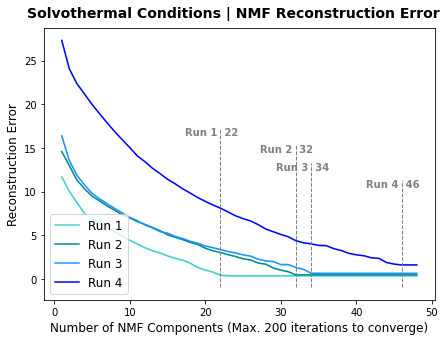

In [26]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_ST_mean, color='mediumturquoise', zorder=2, label='CCE_1')
#ax[0].fill_between(np.arange(1,48,1), cce1_ST_min, cce1_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_ST_mean, color='darkcyan', zorder=2, label='CCE_2')
#ax[0].fill_between(np.arange(1,48,1), cce2_ST_min, cce2_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_ST_mean, color='dodgerblue', zorder=2, label='CCE_3')
#ax[0].fill_between(np.arange(1,48,1), cce3_ST_min, cce3_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_ST_mean, color='blue', zorder=2, label='CCE_4')
#ax[0].fill_between(np.arange(1,48,1), cce4_ST_min, cce4_ST_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1),cce1_ST_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_ST_err_min, cce1_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce2_ST_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_ST_err_min, cce2_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce3_ST_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_ST_err_min, cce3_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1),cce4_ST_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_ST_err_min, cce4_ST_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([22,22], [y11,17.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  22',xy=(22-4.7,16.5), color='grey', fontweight='bold')
ax.plot([32,32], [y11,15.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  32',xy=(32-4.7,14.5), color='grey', fontweight='bold')
ax.plot([34,34], [y11,13.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  34',xy=(34-4.7,12.5), color='grey', fontweight='bold')
ax.plot([46,46], [y11,11.3], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  46',xy=(46-4.7,10.5), color='grey', fontweight='bold')

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration Solvothermal Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Solvothermal Conditions | NMF Reconstruction Error', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_ST.png')

### PCA

In [28]:
variance = []

for i,j in zip([0,48,96,144],[48,96,144,192]):
    model_ = PCA(n_components=48)
    X = model_.fit_transform(arr_ST[i:j])
    err = model_.explained_variance_#ratio_
    #print(model_.explained_variance_, model_.explained_variance_ratio_, '\n')
    
    variance.append(err)
    
cce1_ST_err = [np.log(x) for x in variance[0]]
cce1_ST_err2 = variance[0]
cce1_ST_err_min, cce1_ST_err_max = cce1_ST_err, cce1_ST_err
cce2_ST_err = [np.log(x) for x in variance[1]]
cce2_ST_err2 = variance[1]
cce2_ST_err_min, cce2_ST_err_max = cce2_ST_err, cce2_ST_err
cce3_ST_err = [np.log(x) for x in variance[2]]
cce3_ST_err2 = variance[2]
cce3_ST_err_min, cce3_ST_err_max = cce3_ST_err, cce3_ST_err
cce4_ST_err = [np.log(x) for x in variance[3]]
cce4_ST_err2 = variance[3]
cce4_ST_err_min, cce4_ST_err_max = cce4_ST_err, cce4_ST_err

#df = pd.DataFrame(variance)
#df.T

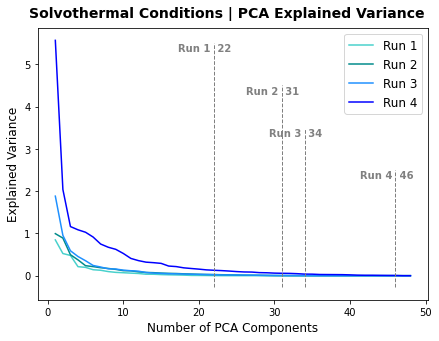

In [29]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_ST_err2, color='mediumturquoise', zorder=2, label='Run 1')
#ax.fill_between(np.arange(1,49,1), cce1_ST_err_min, cce1_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_ST_err2, color='darkcyan', zorder=2, label='Run 2')
#ax.fill_between(np.arange(1,49,1), cce2_ST_err_min, cce2_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_ST_err2, color='dodgerblue', zorder=2, label='Run 3')
#ax.fill_between(np.arange(1,49,1), cce3_ST_err_min, cce3_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_ST_err2, color='blue', zorder=2, label='Run 4')
#ax.fill_between(np.arange(1,49,1), cce4_ST_err_min, cce4_ST_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
adj = 1
ax.plot([22,22], [y11,5.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  22',xy=(22-4.7,5.3/adj), color='grey', fontweight='bold')
ax.plot([31,31], [y11,4.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  31',xy=(31-4.7,4.3/adj), color='grey', fontweight='bold')
ax.plot([34,34], [y11,3.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  34',xy=(34-4.7,3.3/adj), color='grey', fontweight='bold')
ax.plot([46,46], [y11,2.5/adj], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  46',xy=(46-4.7,2.3/adj), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration Solvothermal Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Solvothermal Conditions | PCA Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA explained variance_ST.png')

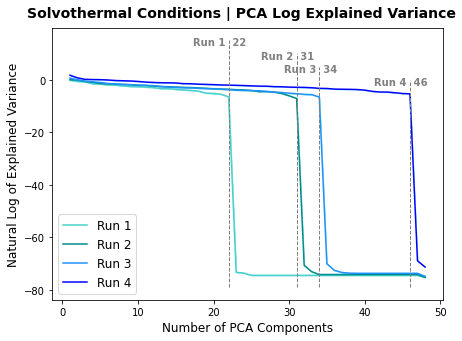

In [30]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_ST_mean, color='mediumturquoise', zorder=2, label='CCE_1')
#ax[0].fill_between(np.arange(1,48,1), cce1_ST_min, cce1_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_ST_mean, color='darkcyan', zorder=2, label='CCE_2')
#ax[0].fill_between(np.arange(1,48,1), cce2_ST_min, cce2_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_ST_mean, color='dodgerblue', zorder=2, label='CCE_3')
#ax[0].fill_between(np.arange(1,48,1), cce3_ST_min, cce3_ST_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_ST_mean, color='blue', zorder=2, label='CCE_4')
#ax[0].fill_between(np.arange(1,48,1), cce4_ST_min, cce4_ST_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
ax.plot(np.arange(1,49,1), cce1_ST_err, color='mediumturquoise', zorder=2, label='Run 1')
ax.fill_between(np.arange(1,49,1), cce1_ST_err_min, cce1_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce2_ST_err, color='darkcyan', zorder=2, label='Run 2')
ax.fill_between(np.arange(1,49,1), cce2_ST_err_min, cce2_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce3_ST_err, color='dodgerblue', zorder=2, label='Run 3')
ax.fill_between(np.arange(1,49,1), cce3_ST_err_min, cce3_ST_err_max, color='paleturquoise', zorder=1)
ax.plot(np.arange(1,49,1), cce4_ST_err, color='blue', zorder=2, label='Run 4')
ax.fill_between(np.arange(1,49,1), cce4_ST_err_min, cce4_ST_err_max, color='paleturquoise', zorder=1)

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Natural Log of Explained Variance', fontsize=12)

# annotate levelling off of reconstruction error reduction
y11,y12 = ax.get_ylim()
ax.plot([22,22], [y11,15], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 1  22',xy=(22-4.7,13), color='grey', fontweight='bold')
ax.plot([31,31], [y11,10], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 2  31',xy=(31-4.7,8), color='grey', fontweight='bold')
ax.plot([34,34], [y11,5], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 3  34',xy=(34-4.7,3), color='grey', fontweight='bold')
ax.plot([46,46], [y11,0], color='grey', linewidth=1, linestyle='--')
ax.annotate('Run 4  46',xy=(46-4.7,-2), color='grey', fontweight='bold')

#ax.set_ylim(-9,2.5)

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration Solvothermal Conditions\n Explained Variance', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('Solvothermal Conditions | PCA Log Explained Variance', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_PCA log explained variance_ST.png')

## Export for Next Step

In [31]:
np.savetxt('output_interpretation//cce_arr_rt.csv', arr_rt, delimiter=',')

np.savetxt('output_interpretation//cce_arr_50.csv', arr_50, delimiter=',')

np.savetxt('output_interpretation//cce_arr_ST.csv', arr_ST, delimiter=',')